In [1]:
#imports

# Data Manipulation & Numerical Operations
import pandas as pd  
import numpy as np  
import re

# Data Visualization
import matplotlib.pyplot as plt  
import seaborn as sns  

# Machine Learning Libraries
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import LabelEncoder  
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor  
from sklearn.metrics import mean_squared_error, r2_score  
from sklearn.metrics import mean_absolute_error 
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/smartphones-dataset/smartphones_cleaned_v6.csv
/kaggle/input/smartphone-dataset/smartphones.csv
/kaggle/input/mobiles-dataset-2025/Mobiles Dataset (2025).csv


In [2]:

smartphones_df = pd.read_csv('/kaggle/input/smartphone-dataset/smartphones.csv')

#Dataset info
print("Dataset Shape:", smartphones_df.shape)
smartphones_df.info()



Dataset Shape: (980, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    int64  
 3   avg_rating                 879 non-null    float64
 4   5G_or_not                  980 non-null    int64  
 5   processor_brand            960 non-null    object 
 6   num_cores                  974 non-null    float64
 7   processor_speed            938 non-null    float64
 8   battery_capacity           969 non-null    float64
 9   fast_charging_available    980 non-null    int64  
 10  fast_charging              769 non-null    float64
 11  ram_capacity               980 non-null    int64  
 12  internal_memory            980 non-null    int64  
 13  screen_size              

In [3]:

mobiles_df = pd.read_csv('/kaggle/input/mobiles-dataset-2025/Mobiles Dataset (2025).csv', encoding='cp1252')

#Dataset info
print("Dataset Shape:", mobiles_df.shape)
mobiles_df.info()


Dataset Shape: (930, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Company Name               930 non-null    object
 1   Model Name                 930 non-null    object
 2   Mobile Weight              930 non-null    object
 3   RAM                        930 non-null    object
 4   Front Camera               930 non-null    object
 5   Back Camera                930 non-null    object
 6   Processor                  930 non-null    object
 7   Battery Capacity           930 non-null    object
 8   Screen Size                930 non-null    object
 9   Launched Price (Pakistan)  930 non-null    object
 10  Launched Price (India)     930 non-null    object
 11  Launched Price (China)     930 non-null    object
 12  Launched Price (USA)       930 non-null    object
 13  Launched Price (Dubai)     930 non-null 

Columns Before EDA:
Index(['brand_name', 'model', 'price', 'rating', 'has_5g', 'has_nfc',
       'has_ir_blaster', 'processor_brand', 'num_cores', 'processor_speed',
       'battery_capacity', 'fast_charging_available', 'fast_charging',
       'ram_capacity', 'internal_memory', 'screen_size', 'refresh_rate',
       'num_rear_cameras', 'num_front_cameras', 'os', 'primary_camera_rear',
       'primary_camera_front', 'extended_memory_available', 'extended_upto',
       'resolution_width', 'resolution_height'],
      dtype='object')

Columns After EDA:
Index(['brand_name', 'model', 'price', 'has_5g', 'processor_brand',
       'num_cores', 'processor_speed', 'ram_capacity', 'internal_memory',
       'screen_size', 'num_front_cameras', 'primary_camera_front',
       'resolution_width', 'resolution_height'],
      dtype='object')


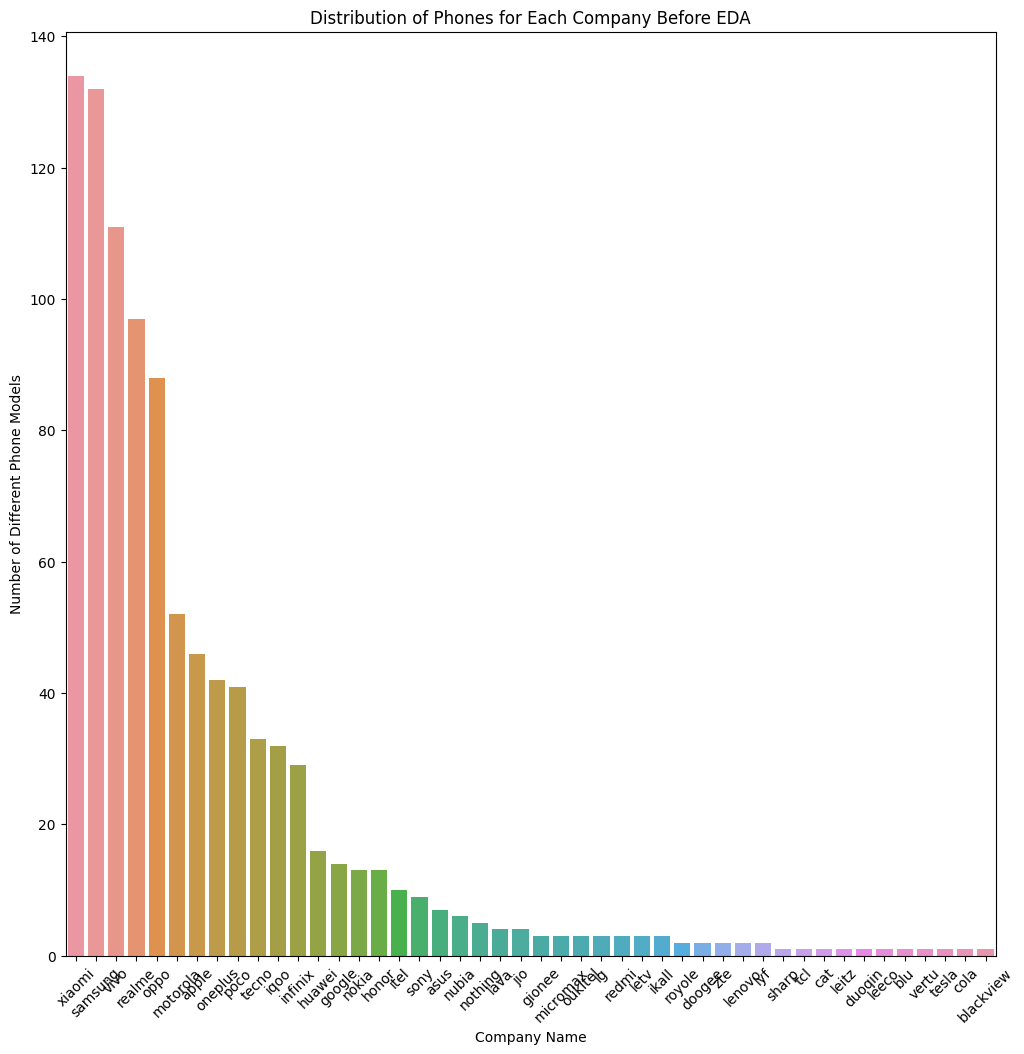

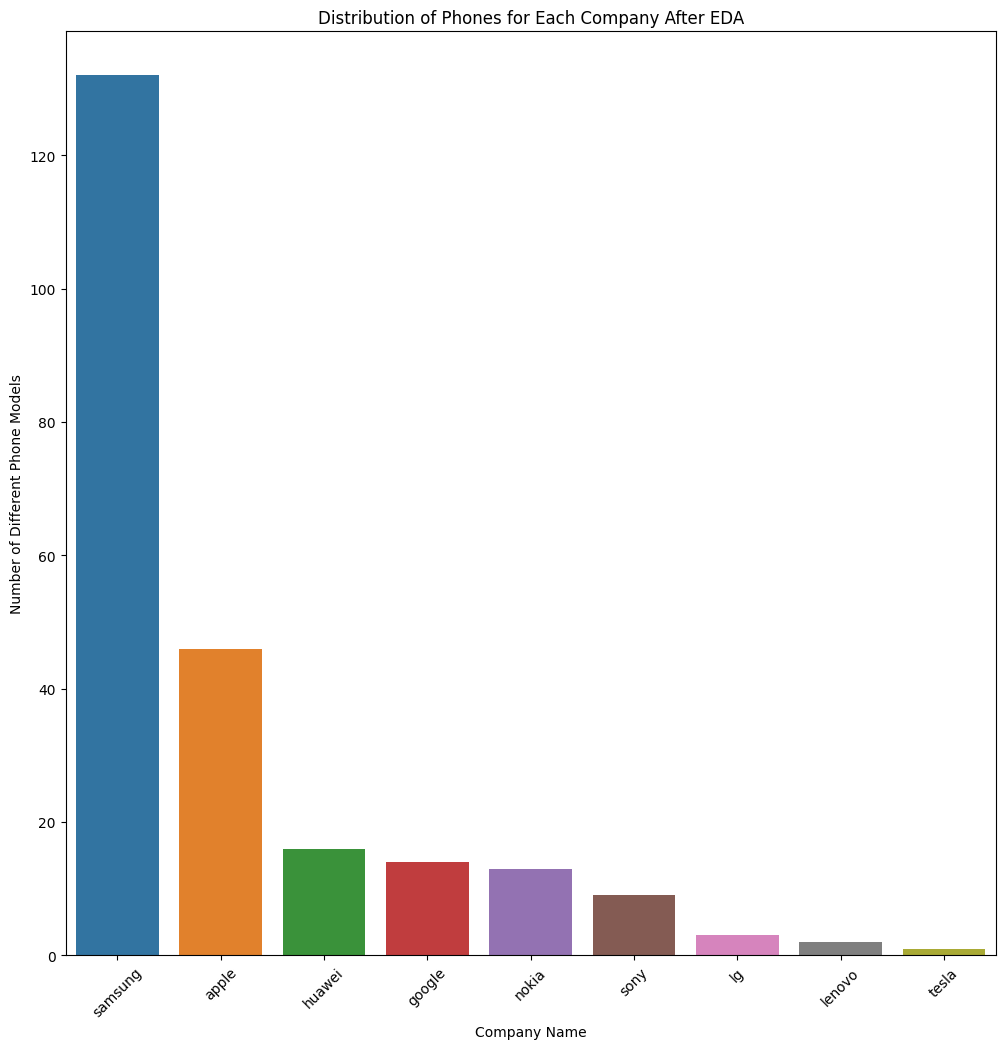


Null Values Per Column:
brand_name               0
model                    0
price                    0
has_5g                   0
processor_brand         13
num_cores                6
processor_speed         34
ram_capacity             0
internal_memory          0
screen_size              0
num_front_cameras        1
primary_camera_front     1
resolution_width         0
resolution_height        0
dtype: int64


In [4]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a function that creates graph that shows distribution of phone models
def creating_graph(title):
  company_names = data3["brand_name"].value_counts()
  plt.figure(figsize = (12, 12))
  sns.barplot(x = company_names.index, y = company_names.values)
  plt.xticks(rotation = 45)
  plt.title(title)
  plt.xlabel("Company Name")
  plt.ylabel("Number of Different Phone Models")
  plt.show()

# Reading the csf file into a pandas dataframe
data3 = pd.read_csv("/kaggle/input/smartphones-dataset/smartphones_cleaned_v6.csv")

# Displaying the columns before EDA
print("Columns Before EDA:")
print(data3.columns)

# Dropping unnecessary features
data3 = data3.drop(columns = ["rating", "has_nfc", "has_ir_blaster", "refresh_rate", "battery_capacity", "fast_charging_available", "fast_charging", "refresh_rate",
                              "num_rear_cameras", "os", "primary_camera_rear", "extended_memory_available", "extended_upto"])

# Displaying the columns after EDA
print("\nColumns After EDA:")
print(data3.columns)

# Calling the function that makes the graph
creating_graph("Distribution of Phones for Each Company Before EDA")

# Removing smaller companies that are not accesibble in all three markets
brands_to_exclude = ["oneplus", "motorola", "realme", "xiaomi", "nothing", "oppo", "vivo", "poco", "tecno", "iqoo", "infinix", "honor", "itel", "asus", "nubia", "lava", "jio",
                     "ikal", "redmi", "micromax", "oukitel", "gionee", "ikall", "letv", "doogee", "lyf", "zte", "royole", "duoqin", "cola", "blu", "vertu", "leeco", "leitz",
                     "cat", "tcl", "sharp", "blackview"]
data3 = data3[~data3['brand_name'].str.lower().isin(brands_to_exclude)]

print()

# Calling the function that makes the graph
creating_graph("Distribution of Phones for Each Company After EDA")

# Displaying the null values per column
print("\nNull Values Per Column:")
print(data3.isnull().sum())

# Converting boolean variables in the "has_5g" column into numbers
data3["has_5g"] = data3["has_5g"].astype(int)

#DATA EXPLORATION

In [5]:

# Function to clean Battery Capacity (e.g., "5000mAh" → 5000)
def clean_battery(value):
    if pd.isna(value):
        return np.nan
    value = str(value)
    return float(value.replace("mAh", "").replace(",", "").strip())

# Function to clean RAM (handles multiple values like "8GB/12GB")
def clean_ram(value):
    if pd.isna(value):
        return np.nan
    value = str(value).replace("GB", "").strip()
    return max(map(float, value.split("/"))) if "/" in value else float(value)

# Function to clean Screen Size (handles multiple screens, e.g., "6.7 (main), 2.7 (external)")
def clean_screen_size(value):
    if pd.isna(value):
        return np.nan
    value = re.sub(r"\(.*?\)", "", str(value))  # Remove anything inside parentheses
    value = value.replace("inches", "").strip()
    sizes = [float(s.strip()) for s in value.split(",") if s.strip()]  # Convert to float
    return max(sizes) if sizes else np.nan  # Take the largest size

# Function to clean Front/Back Camera (handles multiple resolutions like "12MP + 4MP" or "50MP (main)")
def clean_camera(value):
    if pd.isna(value):
        return np.nan
    value = re.sub(r"\(.*?\)", "", str(value))  # Remove text inside parentheses
    value = value.replace("MP", "").strip()
    values = [float(v) for v in re.findall(r"\d+\.?\d*", value)]  # Extract numeric values
    return max(values) if values else np.nan  # Take the highest MP value




In [6]:
def filter_brands_by_market_presence(mobiles_df):
    """Filter to keep only brands that have models available in all three markets: USA, China, and India"""
    
    # First, ensure price columns exist
    required_columns = [
        'Launched Price (USA)', 
        'Launched Price (China)', 
        'Launched Price (India)'
    ]
    
    for col in required_columns:
        if col not in mobiles_df.columns:
            print(f"Warning: Column {col} not found in dataset")
            return mobiles_df
    
    # For each brand, check if they have phones in all three markets
    brands_with_global_presence = []
    
    # Get unique brands
    all_brands = mobiles_df['Company Name'].str.lower().unique()
    
    for brand in all_brands:
        # Get all models from this brand
        brand_models = mobiles_df[mobiles_df['Company Name'].str.lower() == brand]
        
        # Check presence in each market (if any model has a price listed)
        has_usa_presence = brand_models['Launched Price (USA)'].notna().any() and (brand_models['Launched Price (USA)'] != '').any()
        has_china_presence = brand_models['Launched Price (China)'].notna().any() and (brand_models['Launched Price (China)'] != '').any()
        has_india_presence = brand_models['Launched Price (India)'].notna().any() and (brand_models['Launched Price (India)'] != '').any()
        
        # If present in all three markets, add to our list
        if has_usa_presence and has_china_presence and has_india_presence:
            brands_with_global_presence.append(brand)
    
    print(f"Found {len(brands_with_global_presence)} brands with presence in all three markets (USA, China, and India):")
    print(sorted(brands_with_global_presence))
    
    # Filter the dataset to keep only those brands
    filtered_df = mobiles_df[mobiles_df['Company Name'].str.lower().isin(brands_with_global_presence)]
    
    print(f"Original dataset: {len(mobiles_df)} records")
    print(f"Filtered dataset: {len(filtered_df)} records")
    print(f"Removed {len(mobiles_df) - len(filtered_df)} records")
    
    return filtered_df

In [7]:
def filter_brands_by_dual_presence(mobiles_df, smartphones_df):
    """Filter to keep only brands that appear in both datasets and have presence in all three markets"""
    
    # First filter for brands with presence in all three markets
    mobiles_df = filter_brands_by_market_presence(mobiles_df)
    
    # Get unique brands from each dataset (convert to lowercase for case-insensitive comparison)
    mobile_brands = set(mobiles_df['Company Name'].str.lower().unique())
    smartphone_brands = set(smartphones_df['brand_name'].str.lower().unique())
    
    # Find brands present in both datasets
    common_brands = mobile_brands.intersection(smartphone_brands)
    
    print(f"Found {len(common_brands)} brands present in both datasets:")
    print(sorted(common_brands))
    
    # Filter both datasets to keep only those common brands
    filtered_mobiles = mobiles_df[mobiles_df['Company Name'].str.lower().isin(common_brands)]
    filtered_smartphones = smartphones_df[smartphones_df['brand_name'].str.lower().isin(common_brands)]
    
    print(f"Mobiles dataset: {len(mobiles_df)} → {len(filtered_mobiles)} records after filtering")
    print(f"Smartphones dataset: {len(smartphones_df)} → {len(filtered_smartphones)} records after filtering")
    
    return filtered_mobiles, filtered_smartphones

In [8]:
def merge_mobile_datasets(mobiles_file='/kaggle/input/mobiles-dataset-2025/Mobiles Dataset (2025).csv', 
                         smartphones_file='/kaggle/input/smartphone-dataset/smartphones.csv',
                         output_file='combined_mobile_data.csv'):
    """
    Merge two mobile phone datasets, keeping only overlapping columns,
    filtering for year >= 2020
    """
    # Read the datasets
    try:
        mobiles_df = pd.read_csv(mobiles_file, encoding='cp1252')
    except:
        mobiles_df = pd.read_csv(mobiles_file, encoding='utf-8')
    
    try:
        smartphones_df = pd.read_csv(smartphones_file, encoding='utf-8')
    except:
        smartphones_df = pd.read_csv(smartphones_file)
    
    # Print original dataset shapes
    print(f"Original Mobiles Dataset: {mobiles_df.shape[0]} records, {mobiles_df.shape[1]} columns")
    print(f"Original Smartphones Dataset: {smartphones_df.shape[0]} records, {smartphones_df.shape[1]} columns")
    
    # List of columns to remove
    columns_to_remove = [
        'Mobile Weight', 
        'Front Camera', 
        'Launched Price (Pakistan)', 
        'Launched Price (Dubai)'
    ]
    
    # Drop the specified columns
    mobiles_df = mobiles_df.drop(columns=columns_to_remove, errors='ignore')
    
    ## Filter columns and years first
    mobiles_df = mobiles_df.drop(columns=columns_to_remove, errors='ignore')
    mobiles_df = mobiles_df[mobiles_df['Launched Year'] >= 2020].copy()

    # Then apply the dual-presence filter
    mobiles_df, smartphones_df = filter_brands_by_dual_presence(mobiles_df, smartphones_df)
    
    # Column mappings between datasets - now including processor speed
    column_mappings = {
        "Company Name": "brand_name",
        "Model Name": "model",
        "RAM": "ram_capacity",
        "Battery Capacity": "battery_capacity",
        "Screen Size": "screen_size",
        "Back Camera": "primary_camera_rear",
        "Processor": "processor_name",
        "Launched Price (India)": "price_india",
        "Launched Price (China)": "price_china",
        "Launched Price (USA)": "price_usa"
    }
    
    # Process Mobiles Dataset
    mobiles_processed = pd.DataFrame()
    
    # Map and transform columns from Mobiles Dataset
    mobiles_processed['brand_name'] = mobiles_df['Company Name'].str.lower()
    mobiles_processed['model'] = mobiles_df['Model Name']
    
    # Ensure columns are strings before processing
    mobiles_df["Battery Capacity"] = mobiles_df["Battery Capacity"].astype(str)
    mobiles_df["RAM"] = mobiles_df["RAM"].astype(str)
    mobiles_df["Screen Size"] = mobiles_df["Screen Size"].astype(str)
    mobiles_df["Back Camera"] = mobiles_df["Back Camera"].astype(str)
    if "Processor" in mobiles_df.columns:
        mobiles_df["Processor"] = mobiles_df["Processor"].astype(str)
    
    # Extract numeric values from columns with units using improved cleaning functions
    mobiles_processed['ram_capacity'] = mobiles_df['RAM'].apply(clean_ram)
    mobiles_processed['battery_capacity'] = mobiles_df['Battery Capacity'].apply(clean_battery)
    mobiles_processed['screen_size'] = mobiles_df['Screen Size'].apply(clean_screen_size)
    mobiles_processed['primary_camera_rear'] = mobiles_df['Back Camera'].apply(clean_camera)
    
    # Process processor information from mobiles dataset
    if 'Processor' in mobiles_df.columns:
        mobiles_processed['processor_name'] = mobiles_df['Processor']
        # Extract processor speed if available (as an approximation)
        # This is a placeholder as mobiles dataset might not have direct processor speed value
        mobiles_processed['processor_speed'] = 0.0  # Default value
    
    # Add price columns (convert to numeric with 2 decimal places)
    if 'Launched Price (India)' in mobiles_df.columns:
        mobiles_processed['price_india'] = mobiles_df['Launched Price (India)'].apply(lambda x: round(clean_price(x), 2))
    
    if 'Launched Price (China)' in mobiles_df.columns:
        mobiles_processed['price_china'] = mobiles_df['Launched Price (China)'].apply(lambda x: round(clean_price(x), 2))
    
    if 'Launched Price (USA)' in mobiles_df.columns:
        mobiles_processed['price_usa'] = mobiles_df['Launched Price (USA)'].apply(lambda x: round(clean_price(x), 2))
    
    # Add source and year info
    mobiles_processed['source_dataset'] = 'mobiles_2025'
    mobiles_processed['year'] = mobiles_df['Launched Year']
    
    # Process Smartphones Dataset
    smartphones_processed = pd.DataFrame()

    brands_to_exclude = [
    'oneplus', 'vivo', 'oppo', 'realme', 'xiaomi', 'motorola', 
    'tecno', 'infinix', 'honor', 'poco', 'itel', 'lenovo', 'asus', 'nubia',
    'nothing', 'jio', 'lava', 'gionee', 'redmi', 'oukitel'
    ]
    
    # Filter out the excluded brands from smartphones dataset
    smartphones_df = smartphones_df[~smartphones_df['brand_name'].str.lower().isin(brands_to_exclude)]
    print(f"Smartphones Dataset after brand filtering: {smartphones_df.shape[0]} records")
    print(f"Remaining brands in smartphones dataset: {smartphones_df['brand_name'].unique()}")
    
    # Copy over brand name and model directly
    smartphones_processed['brand_name'] = smartphones_df['brand_name'].str.lower()
    smartphones_processed['model'] = smartphones_df['model']
    
    # Convert columns to ensure proper data types and handle NaN values
    smartphones_processed['ram_capacity'] = smartphones_df['ram_capacity'].astype(float)
    smartphones_processed['battery_capacity'] = smartphones_df['battery_capacity'].astype(float)
    smartphones_processed['screen_size'] = smartphones_df['screen_size'].astype(float)
    smartphones_processed['primary_camera_rear'] = smartphones_df['primary_camera_rear'].astype(float)
    
    # Add processor information from smartphones dataset
    if 'processor_brand' in smartphones_df.columns:
        smartphones_processed['processor_name'] = smartphones_df['processor_brand']
    
    # Add processor speed if available
    if 'processor_speed' in smartphones_df.columns:
        smartphones_processed['processor_speed'] = smartphones_df['processor_speed'].astype(float)
    
    # Add price from smartphones dataset if available (with 2 decimal places)
    if 'price' in smartphones_df.columns:
        smartphones_processed['price_global'] = smartphones_df['price'].apply(lambda x: round(float(x), 2) if pd.notnull(x) else np.nan)
    
    # Add source dataset identifier
    smartphones_processed['source_dataset'] = 'smartphones'
    
    # Configure pandas display options to show prices with 2 decimal places

    pd.set_option('display.float_format', '{:.2f}'.format) 
    pd.set_option('display.max_columns', None)
    
    print("\nFirst 5 records from processed Mobiles Dataset:")
    print(mobiles_processed.head(5).fillna('NA'))
    
    print("\nFirst 5 records from processed Smartphones Dataset:")
    print(smartphones_processed.head(5).fillna('NA'))
    
    # Combine the datasets
    combined_df = pd.concat([mobiles_processed, smartphones_processed], ignore_index=True)
    
    # Print first 5 records from combined dataset
    print("\nFirst 5 records from Combined Dataset:")
    print(combined_df.head(5).fillna('NA'))
    
    # Print info about combined dataset
    print(f"\nCombined Dataset: {combined_df.shape[0]} records, {combined_df.shape[1]} columns")
    print(f"Columns in combined dataset: {', '.join(combined_df.columns)}")
    
    # Save the combined dataset
    combined_df.to_csv(output_file, index=False, float_format='%.2f')
    print(f"Combined dataset saved to {output_file}")
    
    return combined_df

# Define the price cleaning function
def clean_price(value):
    if pd.isna(value):
        return np.nan
    
    # Convert to string
    value = str(value)
    
    # Remove currency symbols and commas
    value = value.replace("INR", "").replace("PKR", "").replace("CNY", "")
    value = value.replace("AED", "").replace("USD", "").replace("$", "")
    value = value.replace(",", "").strip()
    
    # Convert to float
    try:
        return float(value)
    except:
        return np.nan

# Run the function
if __name__ == "__main__":
    merge_mobile_datasets()

Original Mobiles Dataset: 930 records, 15 columns
Original Smartphones Dataset: 980 records, 22 columns
Found 18 brands with presence in all three markets (USA, China, and India):
['apple', 'google', 'honor', 'huawei', 'infinix', 'iqoo', 'lenovo', 'motorola', 'nokia', 'oneplus', 'oppo', 'poco', 'realme', 'samsung', 'sony', 'tecno', 'vivo', 'xiaomi']
Original dataset: 847 records
Filtered dataset: 847 records
Removed 0 records
Found 18 brands present in both datasets:
['apple', 'google', 'honor', 'huawei', 'infinix', 'iqoo', 'lenovo', 'motorola', 'nokia', 'oneplus', 'oppo', 'poco', 'realme', 'samsung', 'sony', 'tecno', 'vivo', 'xiaomi']
Mobiles dataset: 847 → 847 records after filtering
Smartphones dataset: 980 → 904 records after filtering
Smartphones Dataset after brand filtering: 262 records
Remaining brands in smartphones dataset: ['apple' 'google' 'huawei' 'iqoo' 'nokia' 'samsung' 'sony']

First 5 records from processed Mobiles Dataset:
  brand_name                 model  ram_capac

Loaded combined dataset with 1109 records
Price columns found: ['price_usa', 'price_china', 'price_india']


<ipython-input-9-b13e85ee79c9>:169: UserWarning: Glyph 8377 (\N{INDIAN RUPEE SIGN}) missing from current font.
  plt.tight_layout(rect=[0, 0.03, 1, 0.97])  # Adjust layout to make room for note
<ipython-input-9-b13e85ee79c9>:170: UserWarning: Glyph 8377 (\N{INDIAN RUPEE SIGN}) missing from current font.
  plt.savefig(output_file, dpi=300, bbox_inches='tight')


Brand visualization saved to brand_distribution.png

Brand Statistics:
Total number of brands: 18
Top 10 brands: samsung, oppo, apple, honor, realme, motorola, vivo, huawei, infinix, oneplus
Average models per brand: 61.6

USA Price Statistics:
Average price across all brands: $631.05
Highest average price: nokia ($3760.18)
Lowest average price: infinix ($245.07)

China Price Statistics:
Average price across all brands: ¥3788.66
Highest average price: apple (¥7005.67)
Lowest average price: nokia (¥1158.18)

India Price Statistics:
Average price across all brands: ₹50830.55
Highest average price: apple (₹105107.52)
Lowest average price: nokia (₹13771.73)


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8377 (\N{INDIAN RUPEE SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


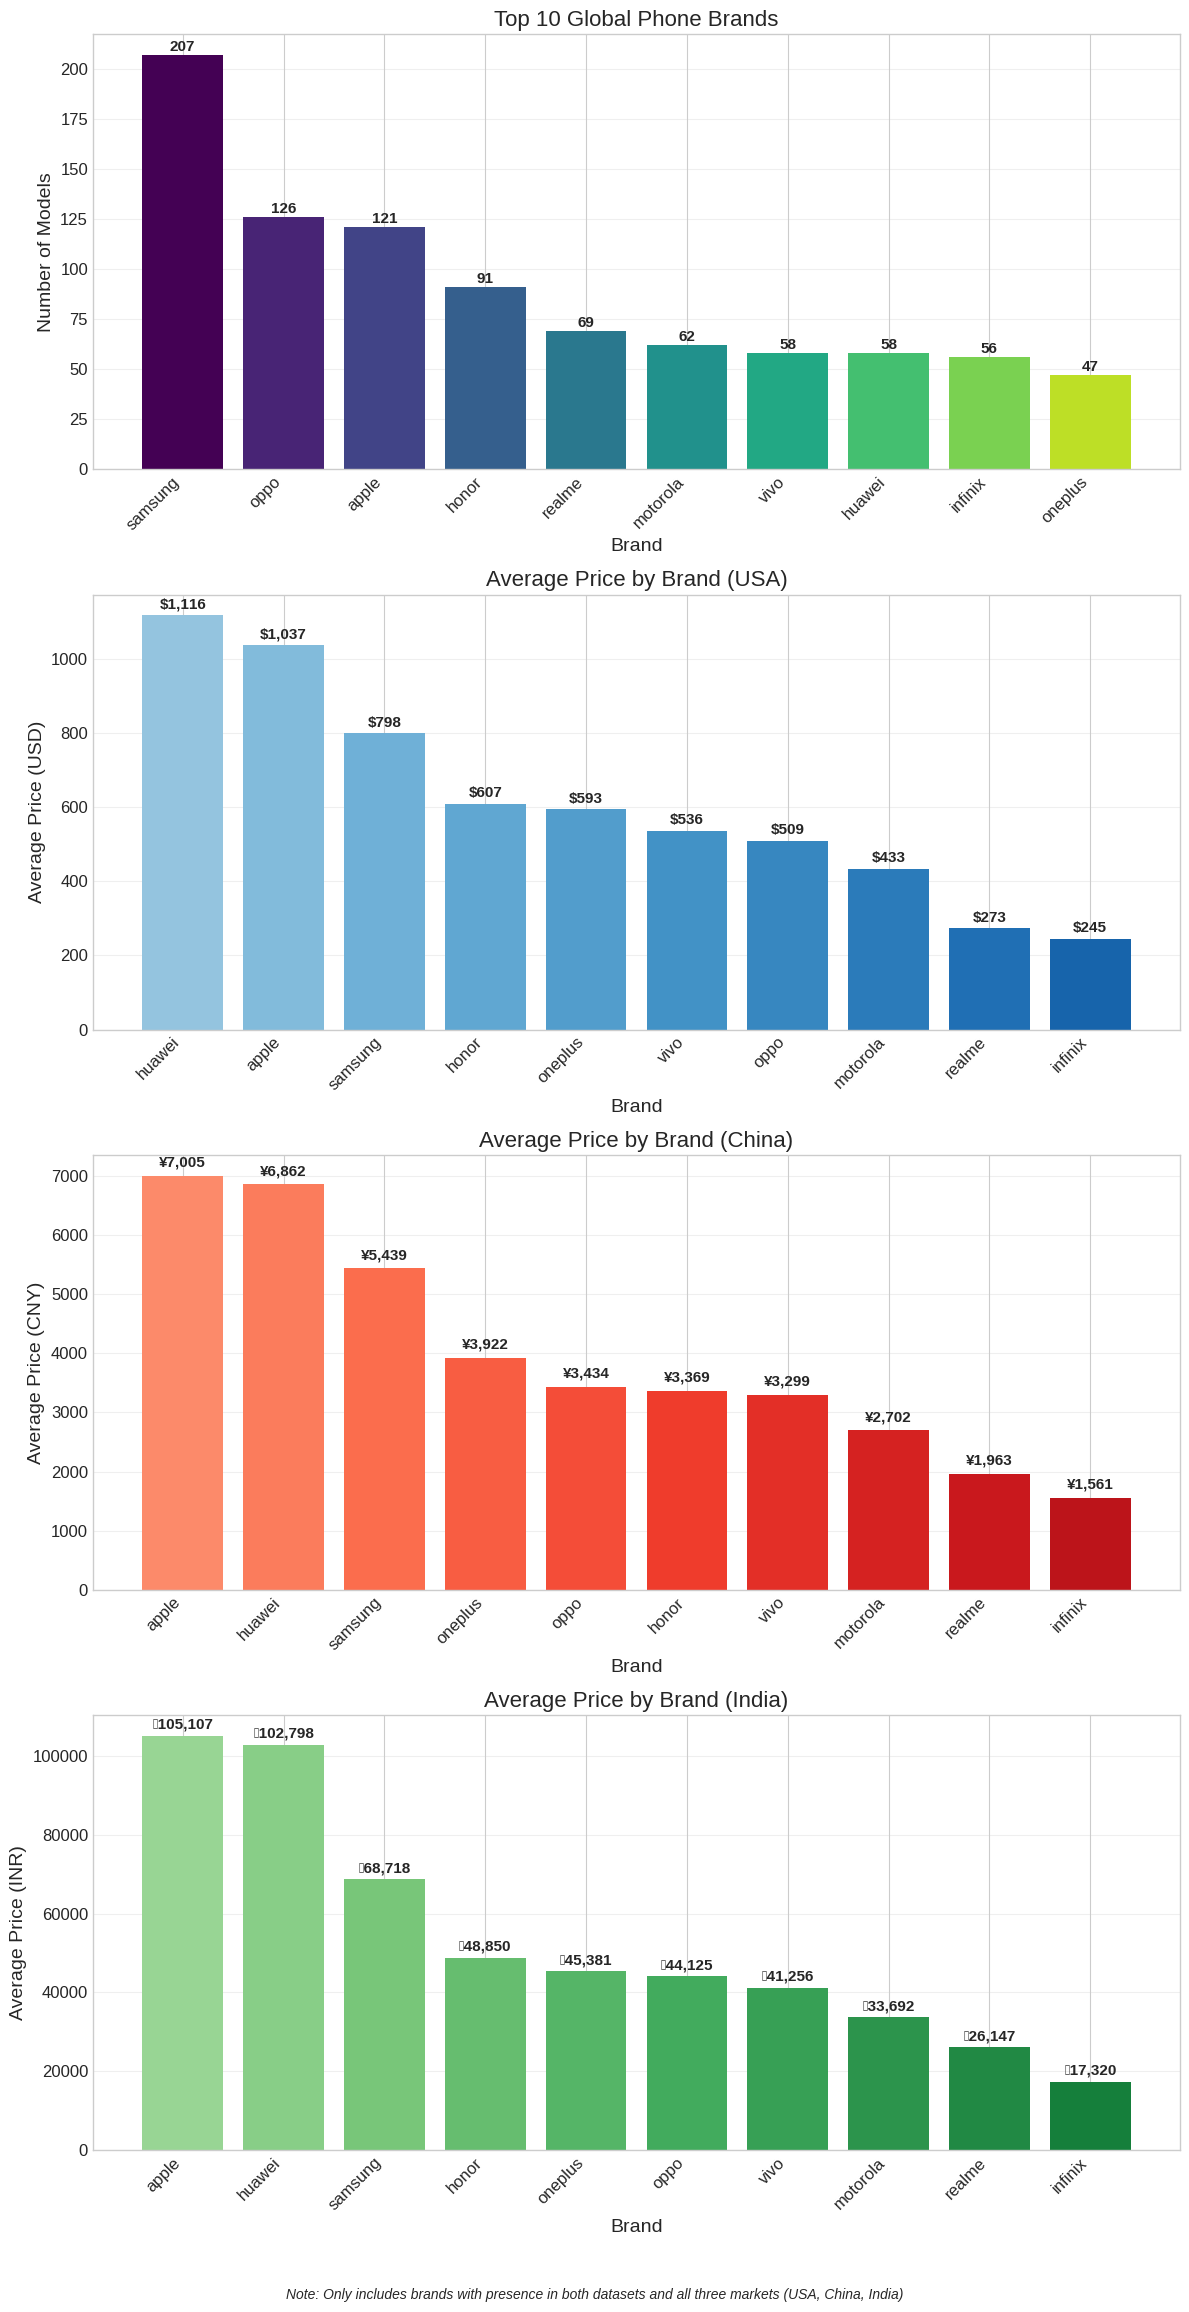

In [9]:
def visualize_phone_brands(combined_df=None, output_file='brand_distribution.png', top_n=10):
    """
    Create visualizations of phone brand distribution and price data from the combined dataset.
    
    Parameters:
    -----------
    combined_df : DataFrame
        The combined mobile phone dataset (filtered for global brands in both datasets)
    output_file : str
        File name to save the visualization
    top_n : int
        Number of top brands to display (default: 10)
    """
    # If no dataframe is provided, load the saved combined dataset
    if combined_df is None:
        try:
            combined_df = pd.read_csv('combined_mobile_data.csv')
            print(f"Loaded combined dataset with {len(combined_df)} records")
        except:
            print("Could not load the combined dataset. Please run the merge_mobile_datasets function first.")
            return
    
    # Check for price columns
    price_columns = ['price_usa', 'price_china', 'price_india']
    available_price_cols = [col for col in price_columns if col in combined_df.columns]
    if available_price_cols:
        print(f"Price columns found: {available_price_cols}")
    else:
        print("Warning: No USA, China, or India price columns found in the dataset")
    
    # Count phones by brand
    brand_counts = combined_df['brand_name'].value_counts().reset_index()
    brand_counts.columns = ['brand', 'count']
    
    # Get count of brands per dataset
    brand_by_source = combined_df.groupby(['brand_name', 'source_dataset']).size().unstack(fill_value=0)
    
    # Keep top N brands for visualization
    top_brands = brand_counts.head(top_n).copy()
    
    # Set up the visualization style
    plt.style.use('seaborn-v0_8-whitegrid')
    
    # Create figure with four subplots (brand counts and prices by country)
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 24))
    
    # First subplot: Bar chart of model counts by brand
    colors = plt.cm.viridis(np.linspace(0, 0.9, len(top_brands)))
    bars = ax1.bar(top_brands['brand'], top_brands['count'], color=colors)
    
    ax1.set_title(f'Top {top_n} Global Phone Brands', fontsize=16)
    ax1.set_xlabel('Brand', fontsize=14)
    ax1.set_ylabel('Number of Models', fontsize=14)
    ax1.tick_params(axis='x', rotation=45, labelsize=12)
    plt.setp(ax1.get_xticklabels(), ha='right')  # Set horizontal alignment separately
    ax1.tick_params(axis='y', labelsize=12)
    ax1.grid(axis='y', alpha=0.3)
    
    # Add count labels above each bar
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                f'{int(height)}', ha='center', va='bottom', fontsize=11, fontweight='bold')
    
    # Second subplot: USA Prices by Brand
    if 'price_usa' in combined_df.columns:
        # Calculate average USA price by brand
        usa_price_data = combined_df.groupby('brand_name')['price_usa'].mean().reset_index()
        usa_price_data.columns = ['brand', 'avg_price']
        usa_price_data = usa_price_data.dropna().sort_values('avg_price', ascending=False)
        
        # Filter to top brands only
        top_brand_usa_prices = usa_price_data[usa_price_data['brand'].isin(top_brands['brand'])]
        
        # Create price bar chart for USA
        usa_bars = ax2.bar(top_brand_usa_prices['brand'], top_brand_usa_prices['avg_price'], 
                     color=plt.cm.Blues(np.linspace(0.4, 0.8, len(top_brand_usa_prices))))
        
        ax2.set_title('Average Price by Brand (USA)', fontsize=16)
        ax2.set_xlabel('Brand', fontsize=14)
        ax2.set_ylabel('Average Price (USD)', fontsize=14)
        ax2.tick_params(axis='x', rotation=45, labelsize=12)
        plt.setp(ax2.get_xticklabels(), ha='right')
        ax2.tick_params(axis='y', labelsize=12)
        ax2.grid(axis='y', alpha=0.3)
        
        # Add price labels
        for bar in usa_bars:
            height = bar.get_height()
            ax2.text(bar.get_x() + bar.get_width()/2., height + 10,
                    f'${int(height):,}', ha='center', va='bottom', fontsize=11, fontweight='bold')
    else:
        ax2.text(0.5, 0.5, "No USA price data available", 
                ha='center', va='center', fontsize=16)
        ax2.set_title('USA Price Comparison (No Data Available)', fontsize=16)
        ax2.axis('off')
    
    # Third subplot: China Prices by Brand
    if 'price_china' in combined_df.columns:
        # Calculate average China price by brand
        china_price_data = combined_df.groupby('brand_name')['price_china'].mean().reset_index()
        china_price_data.columns = ['brand', 'avg_price']
        china_price_data = china_price_data.dropna().sort_values('avg_price', ascending=False)
        
        # Filter to top brands only
        top_brand_china_prices = china_price_data[china_price_data['brand'].isin(top_brands['brand'])]
        
        # Create price bar chart for China
        china_bars = ax3.bar(top_brand_china_prices['brand'], top_brand_china_prices['avg_price'], 
                     color=plt.cm.Reds(np.linspace(0.4, 0.8, len(top_brand_china_prices))))
        
        ax3.set_title('Average Price by Brand (China)', fontsize=16)
        ax3.set_xlabel('Brand', fontsize=14)
        ax3.set_ylabel('Average Price (CNY)', fontsize=14)
        ax3.tick_params(axis='x', rotation=45, labelsize=12)
        plt.setp(ax3.get_xticklabels(), ha='right')
        ax3.tick_params(axis='y', labelsize=12)
        ax3.grid(axis='y', alpha=0.3)
        
        # Add price labels
        for bar in china_bars:
            height = bar.get_height()
            ax3.text(bar.get_x() + bar.get_width()/2., height + 100,
                    f'¥{int(height):,}', ha='center', va='bottom', fontsize=11, fontweight='bold')
    else:
        ax3.text(0.5, 0.5, "No China price data available", 
                ha='center', va='center', fontsize=16)
        ax3.set_title('China Price Comparison (No Data Available)', fontsize=16)
        ax3.axis('off')
    
    # Fourth subplot: India Prices by Brand
    if 'price_india' in combined_df.columns:
        # Calculate average India price by brand
        india_price_data = combined_df.groupby('brand_name')['price_india'].mean().reset_index()
        india_price_data.columns = ['brand', 'avg_price']
        india_price_data = india_price_data.dropna().sort_values('avg_price', ascending=False)
        
        # Filter to top brands only
        top_brand_india_prices = india_price_data[india_price_data['brand'].isin(top_brands['brand'])]
        
        # Create price bar chart for India
        india_bars = ax4.bar(top_brand_india_prices['brand'], top_brand_india_prices['avg_price'], 
                     color=plt.cm.Greens(np.linspace(0.4, 0.8, len(top_brand_india_prices))))
        
        ax4.set_title('Average Price by Brand (India)', fontsize=16)
        ax4.set_xlabel('Brand', fontsize=14)
        ax4.set_ylabel('Average Price (INR)', fontsize=14)
        ax4.tick_params(axis='x', rotation=45, labelsize=12)
        plt.setp(ax4.get_xticklabels(), ha='right')
        ax4.tick_params(axis='y', labelsize=12)
        ax4.grid(axis='y', alpha=0.3)
        
        # Add price labels
        for bar in india_bars:
            height = bar.get_height()
            ax4.text(bar.get_x() + bar.get_width()/2., height + 1000,
                    f'₹{int(height):,}', ha='center', va='bottom', fontsize=11, fontweight='bold')
    else:
        ax4.text(0.5, 0.5, "No India price data available", 
                ha='center', va='center', fontsize=16)
        ax4.set_title('India Price Comparison (No Data Available)', fontsize=16)
        ax4.axis('off')
    
    # Add a note about the filtering criteria
    plt.figtext(0.5, 0.01, 
        "Note: Only includes brands with presence in both datasets and all three markets (USA, China, India)",
        ha='center', fontsize=10, style='italic')
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.97])  # Adjust layout to make room for note
    plt.savefig(output_file, dpi=300, bbox_inches='tight')
    print(f"Brand visualization saved to {output_file}")
    
    # Additional analysis
    print("\nBrand Statistics:")
    print(f"Total number of brands: {len(brand_counts)}")
    print(f"Top {min(top_n, len(brand_counts))} brands: {', '.join(brand_counts['brand'].head(top_n))}")
    print(f"Average models per brand: {brand_counts['count'].mean():.1f}")
    
    # Print price statistics by country
    if 'price_usa' in combined_df.columns:
        print("\nUSA Price Statistics:")
        print(f"Average price across all brands: ${combined_df['price_usa'].mean():.2f}")
        if not usa_price_data.empty:
            print(f"Highest average price: {usa_price_data['brand'].iloc[0]} (${usa_price_data['avg_price'].iloc[0]:.2f})")
            print(f"Lowest average price: {usa_price_data['brand'].iloc[-1]} (${usa_price_data['avg_price'].iloc[-1]:.2f})")
    
    if 'price_china' in combined_df.columns:
        print("\nChina Price Statistics:")
        print(f"Average price across all brands: ¥{combined_df['price_china'].mean():.2f}")
        if not china_price_data.empty:
            print(f"Highest average price: {china_price_data['brand'].iloc[0]} (¥{china_price_data['avg_price'].iloc[0]:.2f})")
            print(f"Lowest average price: {china_price_data['brand'].iloc[-1]} (¥{china_price_data['avg_price'].iloc[-1]:.2f})")
            
    if 'price_india' in combined_df.columns:
        print("\nIndia Price Statistics:")
        print(f"Average price across all brands: ₹{combined_df['price_india'].mean():.2f}")
        if not india_price_data.empty:
            print(f"Highest average price: {india_price_data['brand'].iloc[0]} (₹{india_price_data['avg_price'].iloc[0]:.2f})")
            print(f"Lowest average price: {india_price_data['brand'].iloc[-1]} (₹{india_price_data['avg_price'].iloc[-1]:.2f})")
    
    return {
        'brand_counts': brand_counts,
        'usa_price_data': usa_price_data if 'usa_price_data' in locals() else None,
        'china_price_data': china_price_data if 'china_price_data' in locals() else None,
        'india_price_data': india_price_data if 'india_price_data' in locals() else None
    }

# If running directly, try to load and visualize the existing combined dataset
if __name__ == "__main__":
    visualize_phone_brands()

ENCODING CATEGORICAL FEATURES

In [10]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

# First, load the combined dataset
# Either use the result from your merge function or load from CSV
try:
    # Try to load from CSV if it exists
    combined_df = pd.read_csv('combined_mobile_data.csv')
    print(f"Loaded combined dataset with {len(combined_df)} records")
except FileNotFoundError:
    print("Combined dataset file not found. Please run the merge function first or check the file path.")
    # You could add code here to call your merge function if needed

# Now proceed with label encoding
# List of categorical columns to encode
categorical_columns = ["brand_name", "model", "source_dataset"]

# Apply Label Encoding to each categorical column
label_encoders = {}
for col in categorical_columns:
    if col in combined_df.columns:
        le = LabelEncoder()
        combined_df[col] = le.fit_transform(combined_df[col])  # Convert text to numbers
        label_encoders[col] = le  # Store encoders for future use (if needed)
        print(f"Encoded {col} into {len(le.classes_)} unique values")

# Process price columns
price_columns = [
    "Launched Price (India)", 
    "Launched Price (China)", 
    "Launched Price (USA)",
    "Price_USD_PKR", 
    "Price_USD_INR", 
    "Price_USD_CNY", 
    "Price_USD_AED", 
    "Price_USD_USA"
]

# Function to clean price columns
def clean_price(value):
    if pd.isna(value):
        return np.nan
    
    # Convert to string
    value = str(value)
    
    # Remove currency symbols and commas
    value = value.replace("INR", "").replace("PKR", "").replace("CNY", "")
    value = value.replace("AED", "").replace("USD", "").replace("$", "")
    value = value.replace(",", "").strip()
    
    # Convert to float
    try:
        return float(value)
    except:
        return np.nan

# Apply price cleaning to each price column that exists in the dataset
for col in price_columns:
    if col in combined_df.columns:
        combined_df[col] = combined_df[col].apply(clean_price)
        print(f"Cleaned price column: {col}")

# Display dataset info after transformations
print("\nDataset after encoding and price conversion:")
print(f"Shape: {combined_df.shape}")
print("\nSample of encoded data:")
print(combined_df.head())

# Save the transformed dataset
combined_df.to_csv('combined_encoded_data.csv', index=False)
print("Saved encoded dataset to 'combined_encoded_data.csv'")

Loaded combined dataset with 1109 records
Encoded brand_name into 18 unique values
Encoded model into 1087 unique values
Encoded source_dataset into 2 unique values

Dataset after encoding and price conversion:
Shape: (1109, 14)

Sample of encoded data:
   brand_name  model  ram_capacity  battery_capacity  screen_size  \
0           0   1042          6.00           3600.00         6.10   
1           0   1043          6.00           3600.00         6.10   
2           0   1044          6.00           3600.00         6.10   
3           0   1045          6.00           4200.00         6.70   
4           0   1046          6.00           4200.00         6.70   

   primary_camera_rear processor_name  processor_speed  price_india  \
0                48.00     A17 Bionic             0.00     79999.00   
1                48.00     A17 Bionic             0.00     84999.00   
2                48.00     A17 Bionic             0.00     89999.00   
3                48.00     A17 Bionic          

#PRICE PREDICTION 

Using existing combined DataFrame
Dataset shape: (1109, 14)
Available columns: ['brand_name', 'model', 'ram_capacity', 'battery_capacity', 'screen_size', 'primary_camera_rear', 'processor_name', 'processor_speed', 'price_india', 'price_china', 'price_usa', 'source_dataset', 'year', 'price_global']
Available features: ['ram_capacity', 'battery_capacity', 'screen_size', 'primary_camera_rear', 'brand_name', 'processor_name']
Available price columns: ['price_usa', 'price_china', 'price_india', 'price_global']
Numerical features: ['ram_capacity', 'battery_capacity', 'screen_size', 'primary_camera_rear']
Categorical features: ['brand_name', 'processor_name']

--- Modeling for price_usa ---
Rows with valid price_usa data: 847
Training set: 677 samples
Testing set: 170 samples

Training Linear Regression model...
  R² Score: -0.6405
  RMSE: 564.40


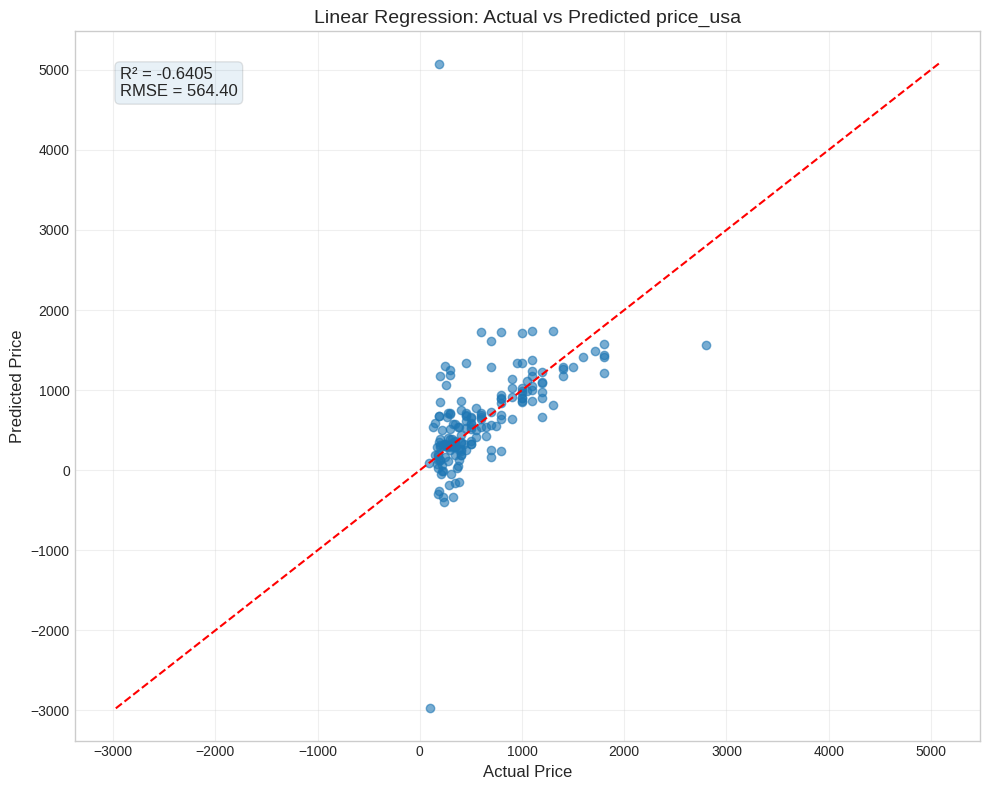


Training Random Forest model...
  R² Score: 0.8870
  RMSE: 148.11


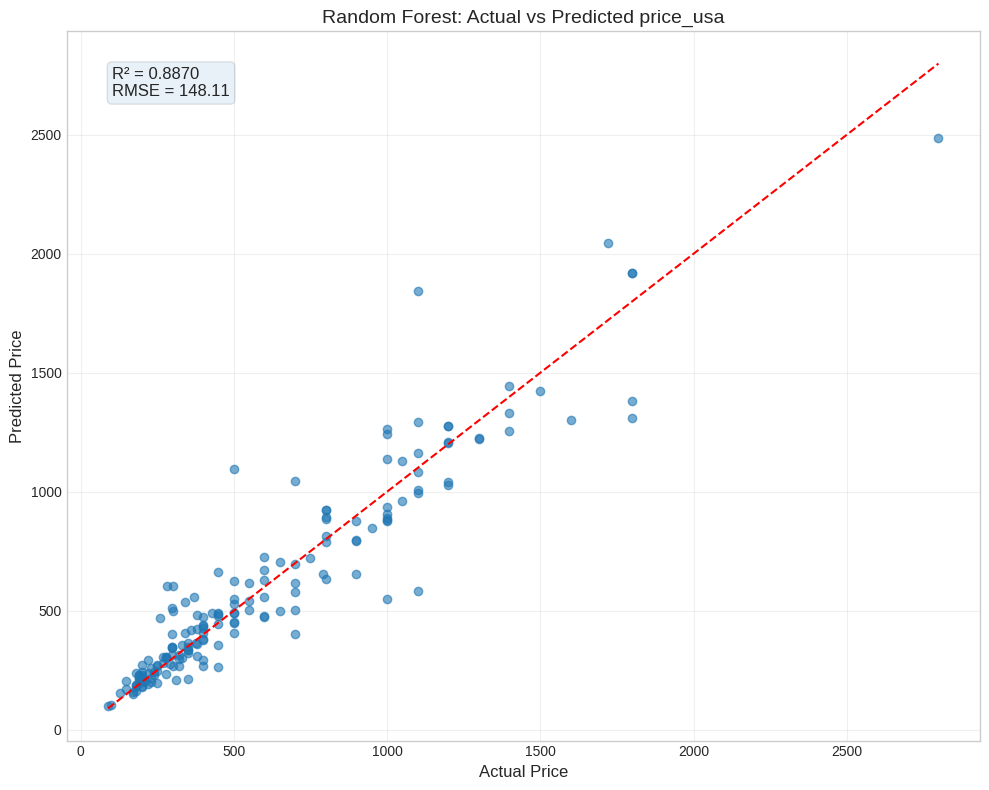

  Top 10 features by importance:
                          Feature  Importance
193    processor_name_Unisoc T612        0.41
2                     screen_size        0.13
0                    ram_capacity        0.11
1                battery_capacity        0.09
4                    brand_name_0        0.07
16                  brand_name_12        0.04
3             primary_camera_rear        0.04
12                   brand_name_8        0.04
59   processor_name_Kirin 9000 5G        0.01
7                    brand_name_3        0.01


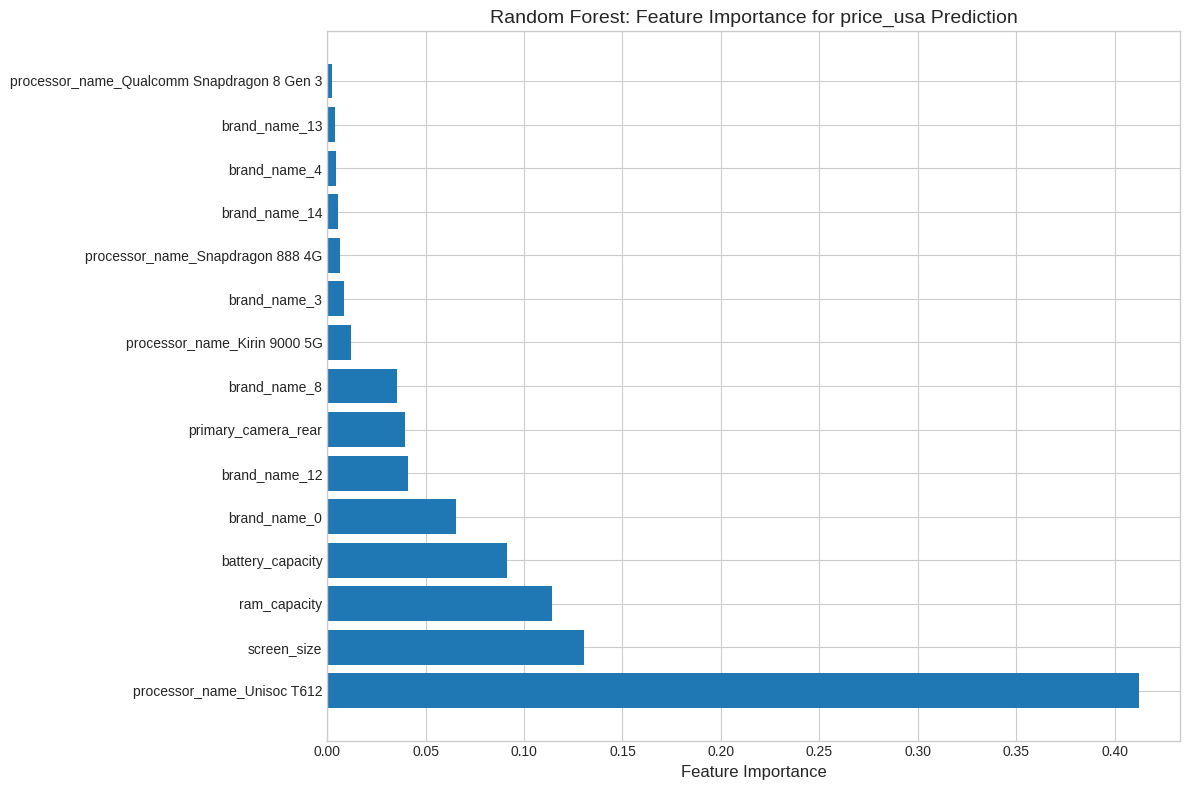


  Feature categories ranked by importance:
      Feature Category  Total Importance
5       processor_name              0.45
4           brand_name              0.17
2          screen_size              0.13
0         ram_capacity              0.11
1     battery_capacity              0.09
3  primary_camera_rear              0.04


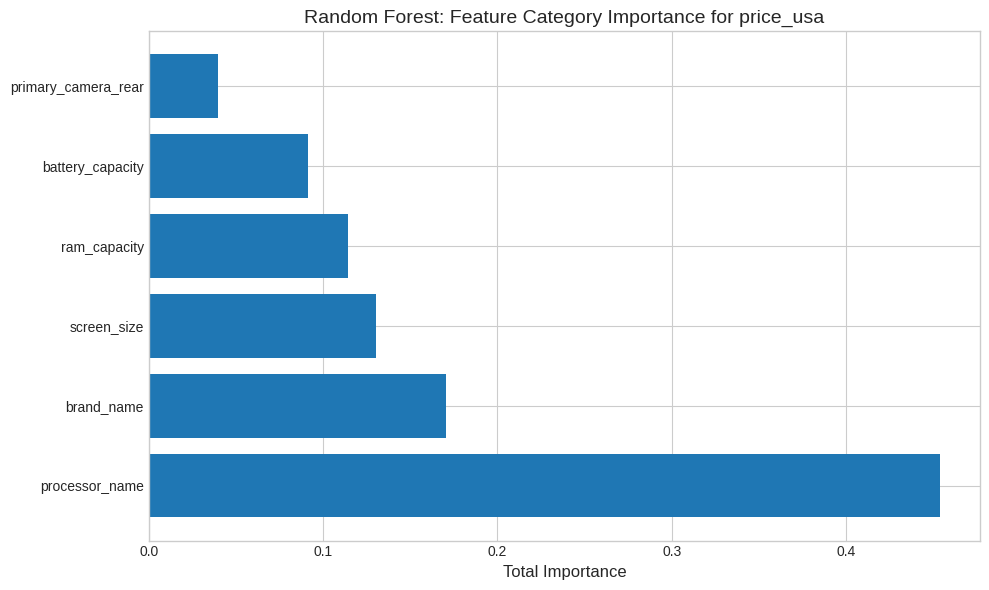


Training XGBoost model...
  R² Score: 0.8819
  RMSE: 151.46


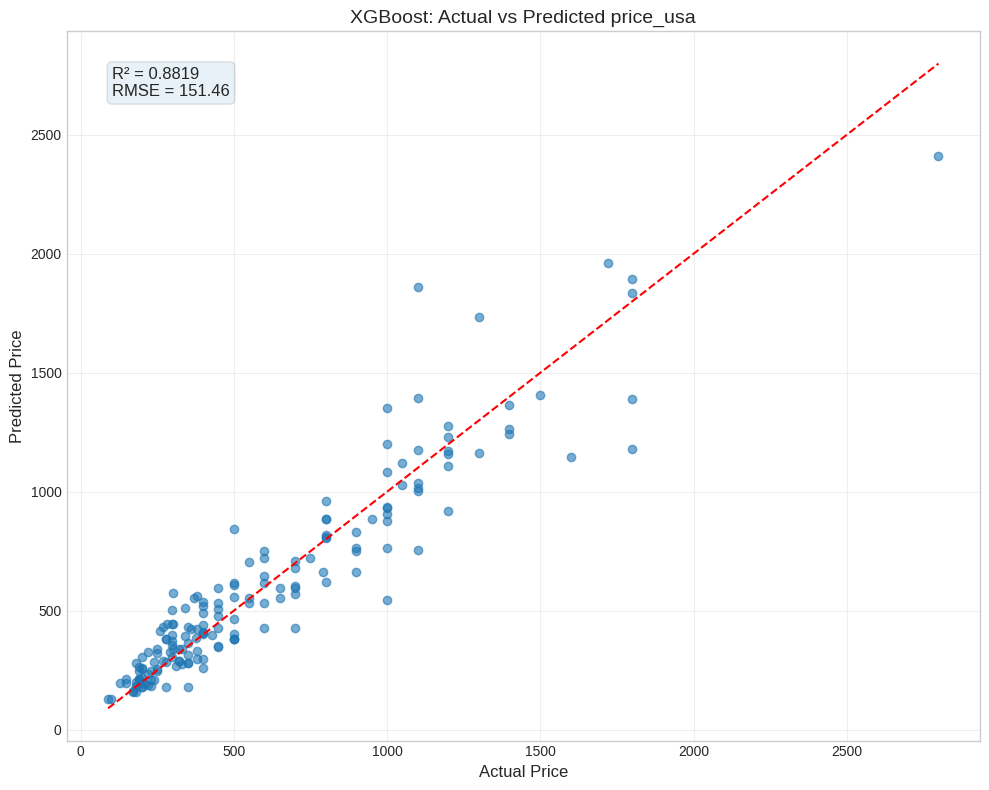

  Top 10 features by importance:
                               Feature  Importance
193         processor_name_Unisoc T612        0.74
1                     battery_capacity        0.11
4                         brand_name_0        0.06
0                         ram_capacity        0.01
2                          screen_size        0.01
7                         brand_name_3        0.01
8                         brand_name_4        0.01
16                       brand_name_12        0.00
17                       brand_name_13        0.00
177  processor_name_Snapdragon 8 Gen 2        0.00


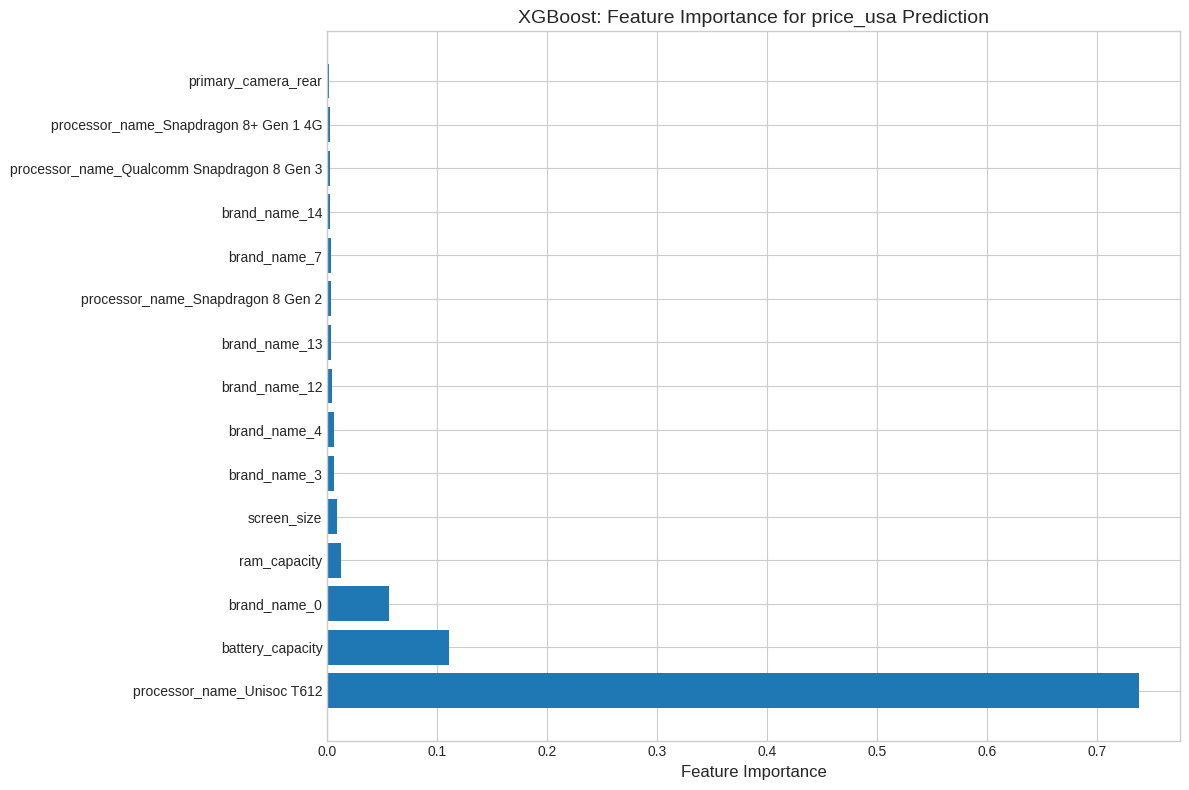


  Feature categories ranked by importance:
      Feature Category  Total Importance
5       processor_name              0.78
1     battery_capacity              0.11
4           brand_name              0.09
0         ram_capacity              0.01
2          screen_size              0.01
3  primary_camera_rear              0.00


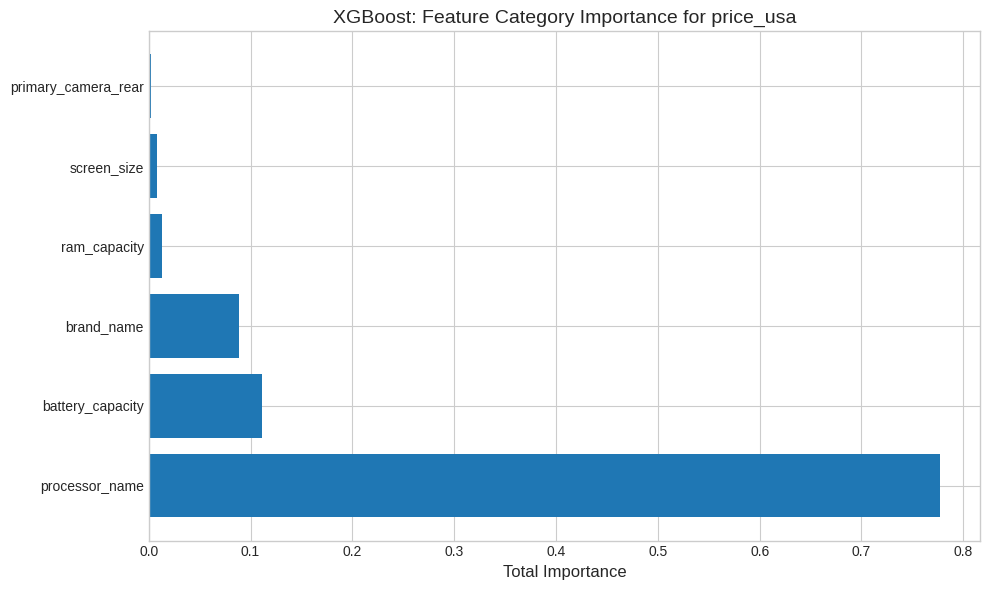


Best model for price_usa: Random Forest (R² = 0.8870)


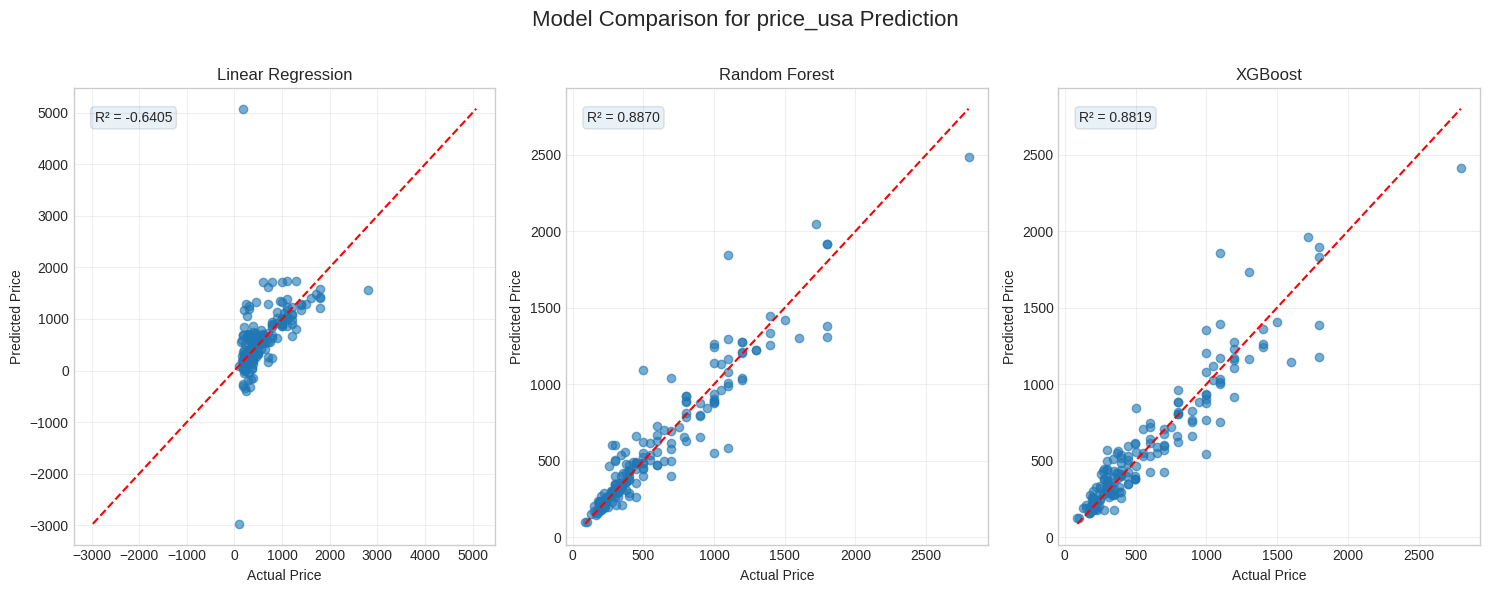


--- Modeling for price_china ---
Rows with valid price_china data: 846
Training set: 676 samples
Testing set: 170 samples

Training Linear Regression model...
  R² Score: 0.8203
  RMSE: 1088.71


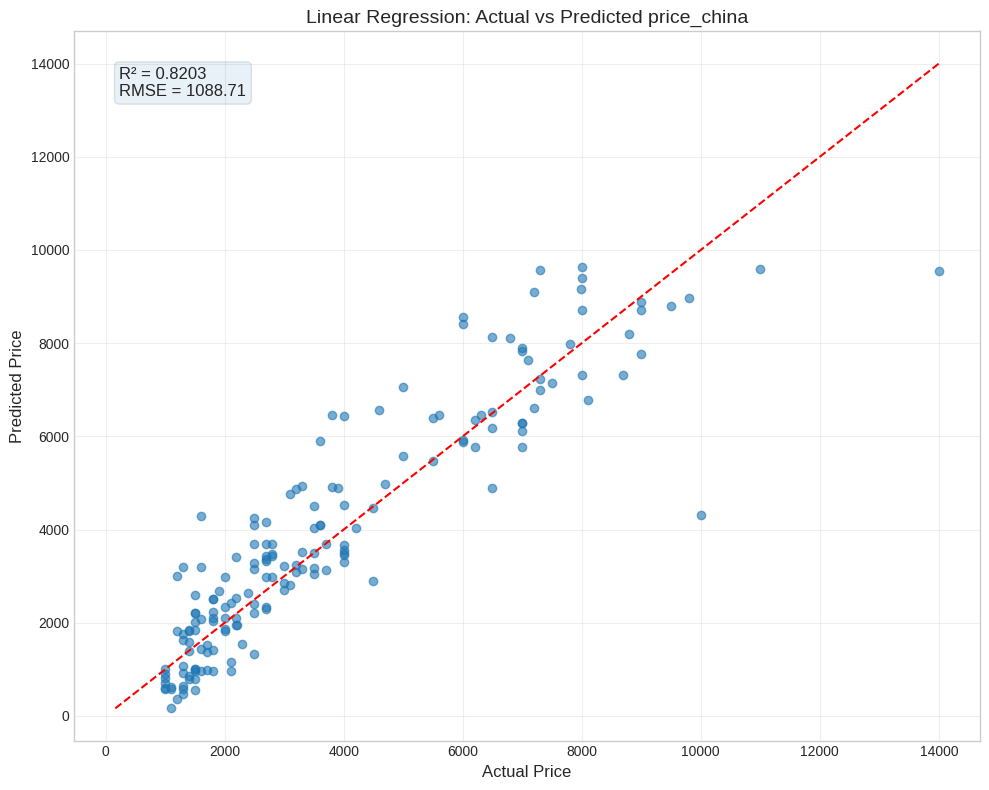


Training Random Forest model...
  R² Score: 0.8902
  RMSE: 851.13


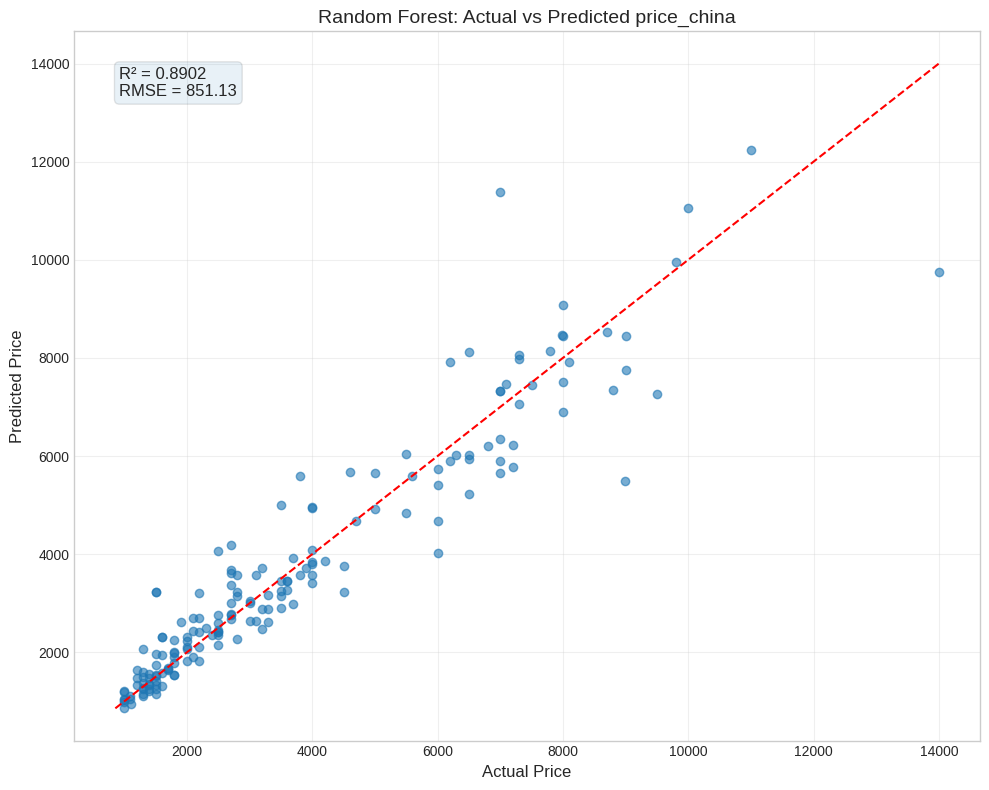

  Top 10 features by importance:
                               Feature  Importance
0                         ram_capacity        0.28
2                          screen_size        0.20
4                         brand_name_0        0.19
1                     battery_capacity        0.09
58        processor_name_Kirin 9000 5G        0.03
17                       brand_name_13        0.03
3                  primary_camera_rear        0.02
178  processor_name_Snapdragon 8 Gen 2        0.02
188   processor_name_Snapdragon 888 4G        0.02
16                       brand_name_12        0.01


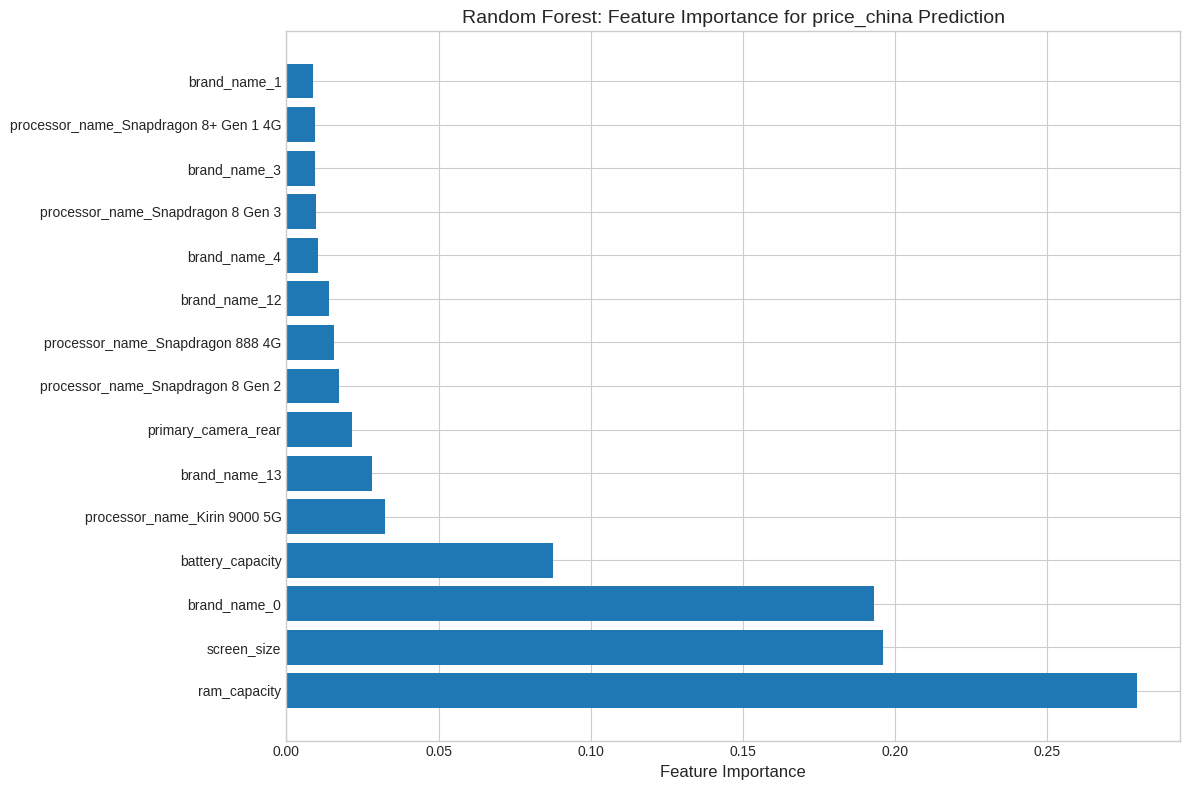


  Feature categories ranked by importance:
      Feature Category  Total Importance
4           brand_name              0.28
0         ram_capacity              0.28
2          screen_size              0.20
5       processor_name              0.13
1     battery_capacity              0.09
3  primary_camera_rear              0.02


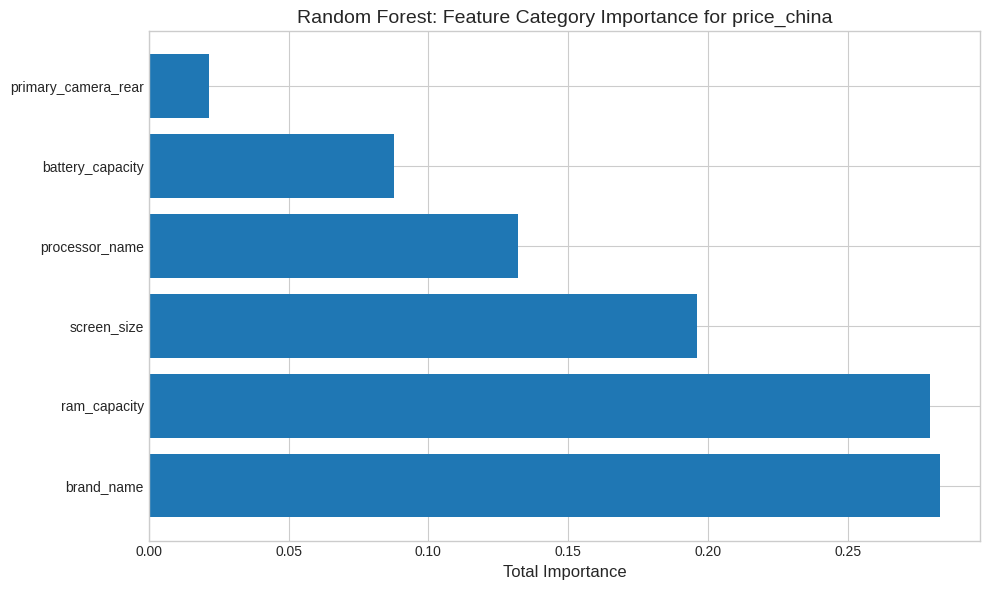


Training XGBoost model...
  R² Score: 0.9070
  RMSE: 783.27


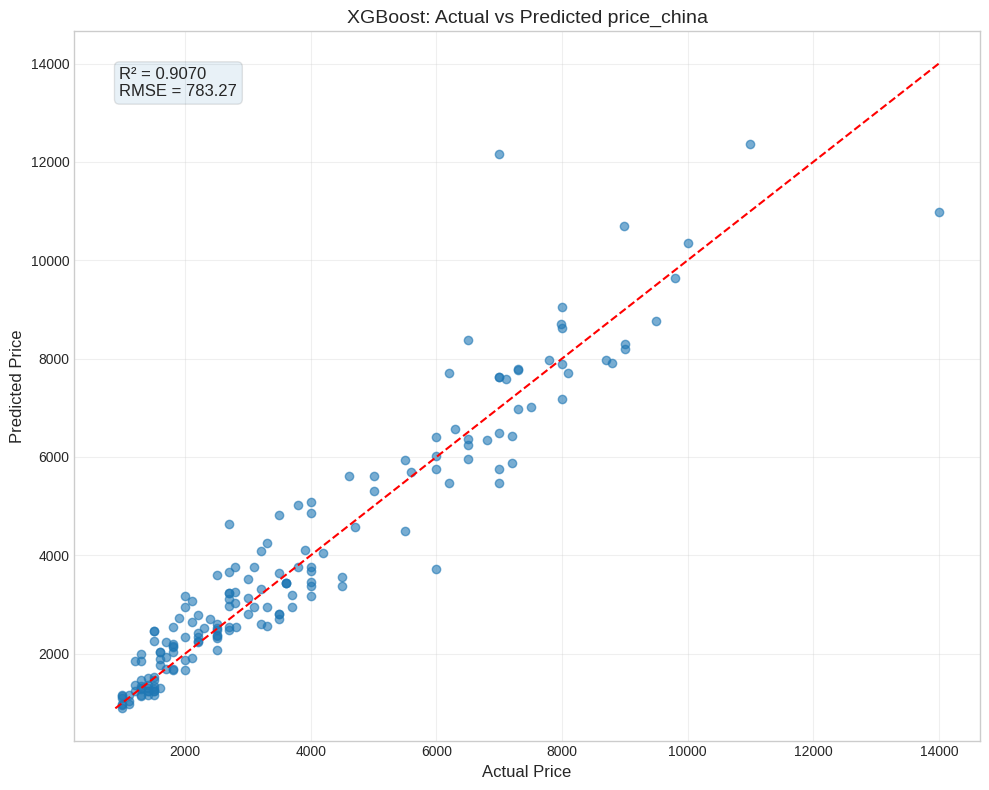

  Top 10 features by importance:
                               Feature  Importance
4                         brand_name_0        0.40
0                         ram_capacity        0.05
58        processor_name_Kirin 9000 5G        0.05
2                          screen_size        0.04
188   processor_name_Snapdragon 888 4G        0.04
8                         brand_name_4        0.03
7                         brand_name_3        0.03
17                       brand_name_13        0.03
16                       brand_name_12        0.02
177  processor_name_Snapdragon 8 Gen 1        0.02


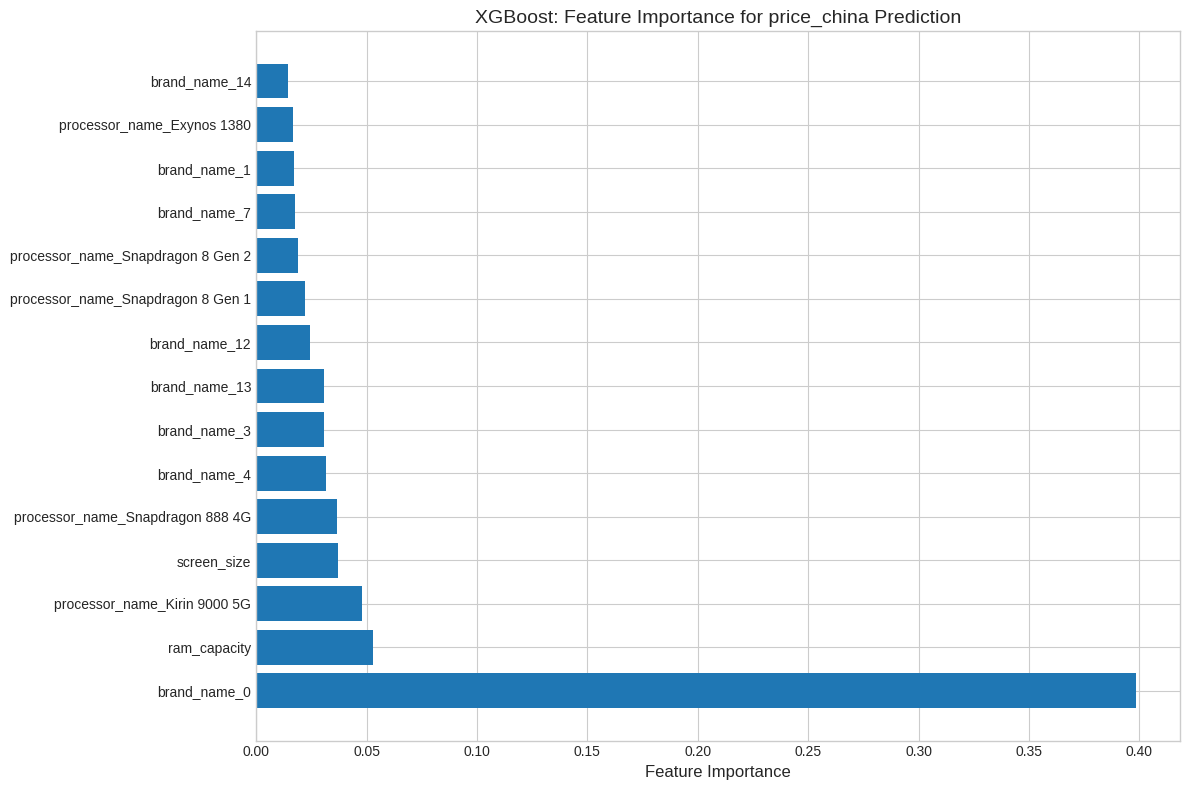


  Feature categories ranked by importance:
      Feature Category  Total Importance
4           brand_name              0.60
5       processor_name              0.29
0         ram_capacity              0.05
2          screen_size              0.04
1     battery_capacity              0.01
3  primary_camera_rear              0.01


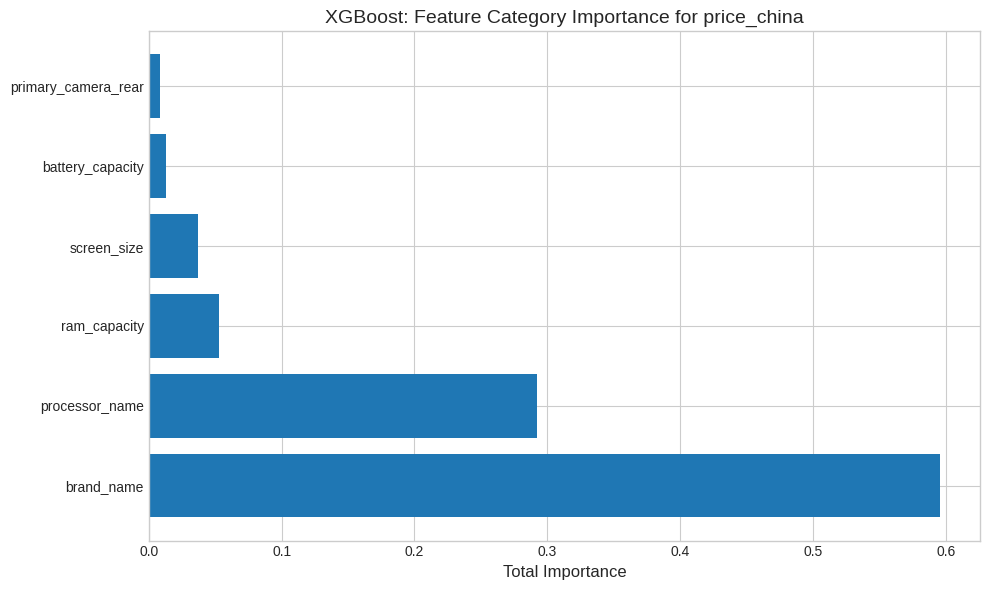


Best model for price_china: XGBoost (R² = 0.9070)


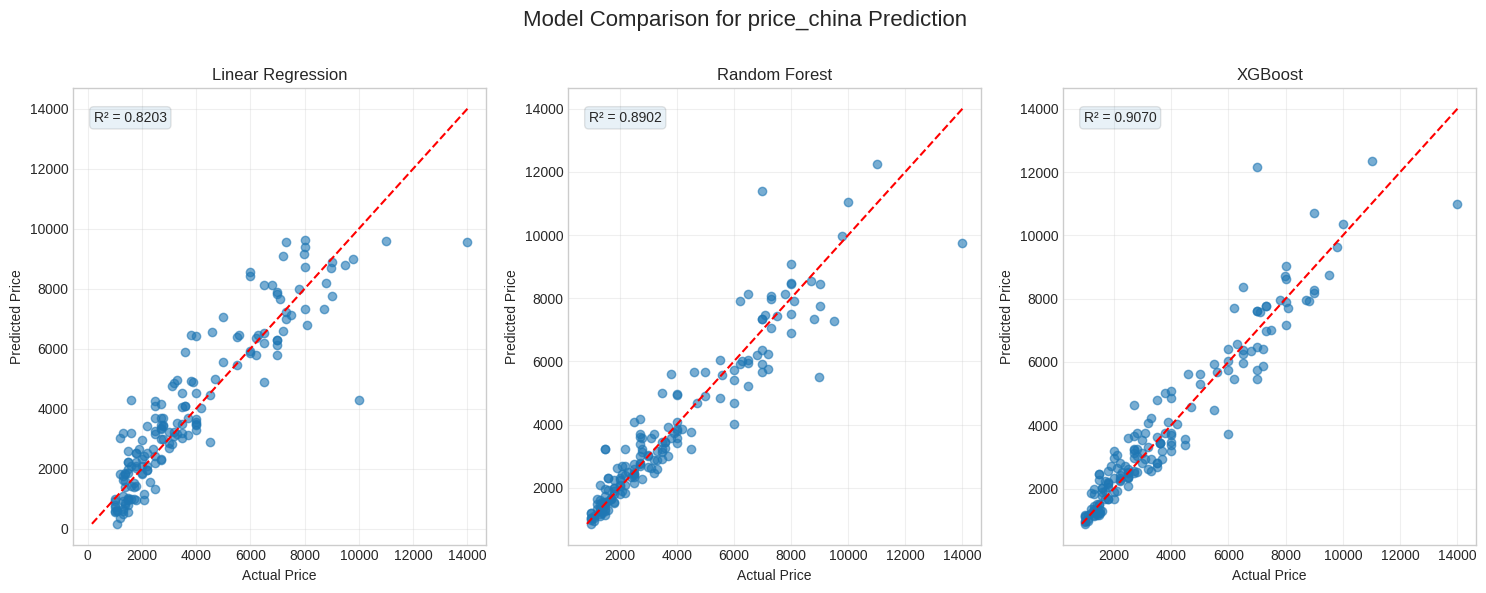


--- Modeling for price_india ---
Rows with valid price_india data: 847
Training set: 677 samples
Testing set: 170 samples

Training Linear Regression model...
  R² Score: 0.7780
  RMSE: 20180.79


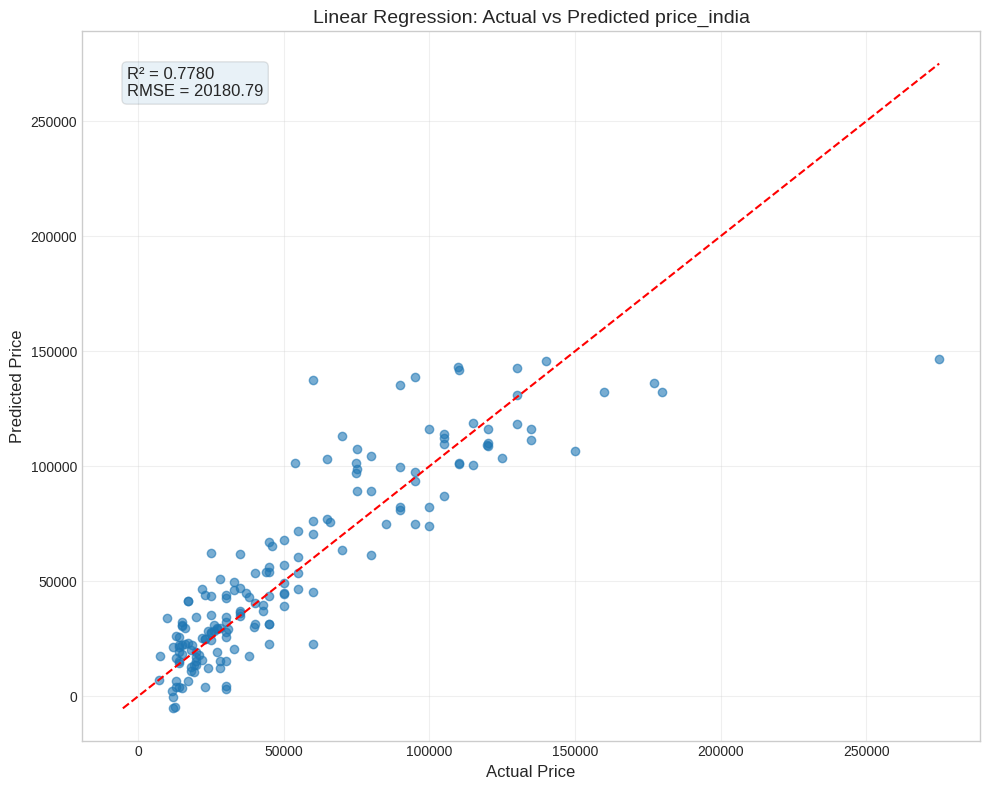


Training Random Forest model...
  R² Score: 0.8867
  RMSE: 14417.62


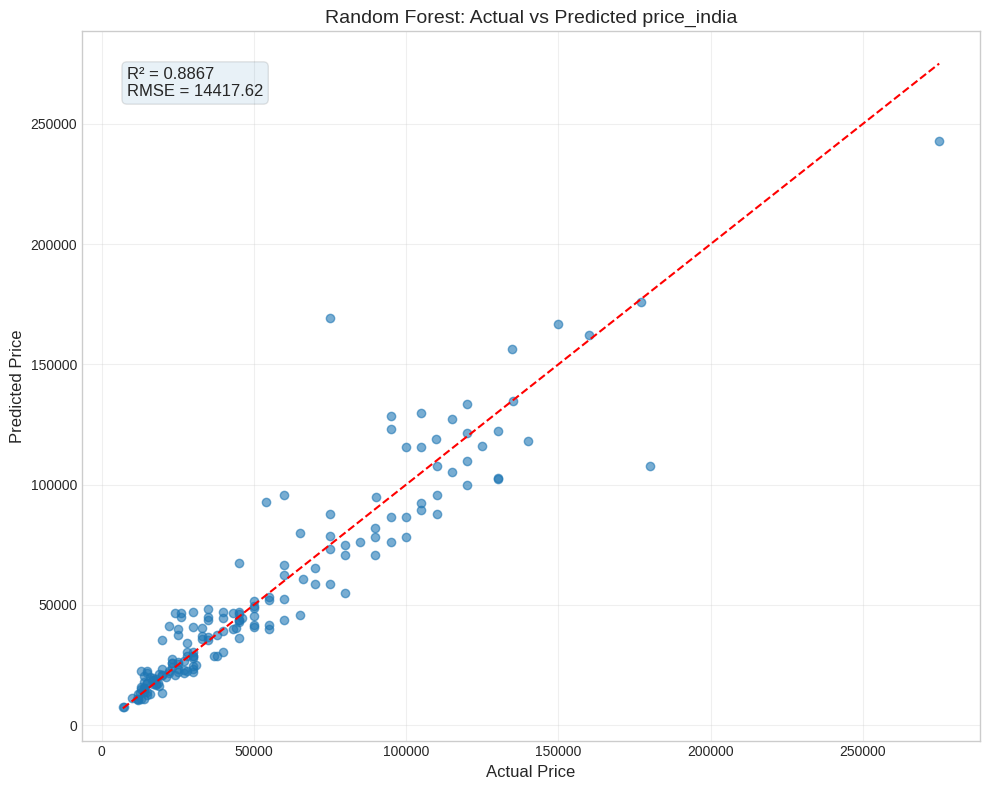

  Top 10 features by importance:
                               Feature  Importance
0                         ram_capacity        0.29
4                         brand_name_0        0.22
2                          screen_size        0.16
1                     battery_capacity        0.09
59        processor_name_Kirin 9000 5G        0.03
7                         brand_name_3        0.03
3                  primary_camera_rear        0.02
17                       brand_name_13        0.02
187   processor_name_Snapdragon 888 4G        0.02
177  processor_name_Snapdragon 8 Gen 2        0.01


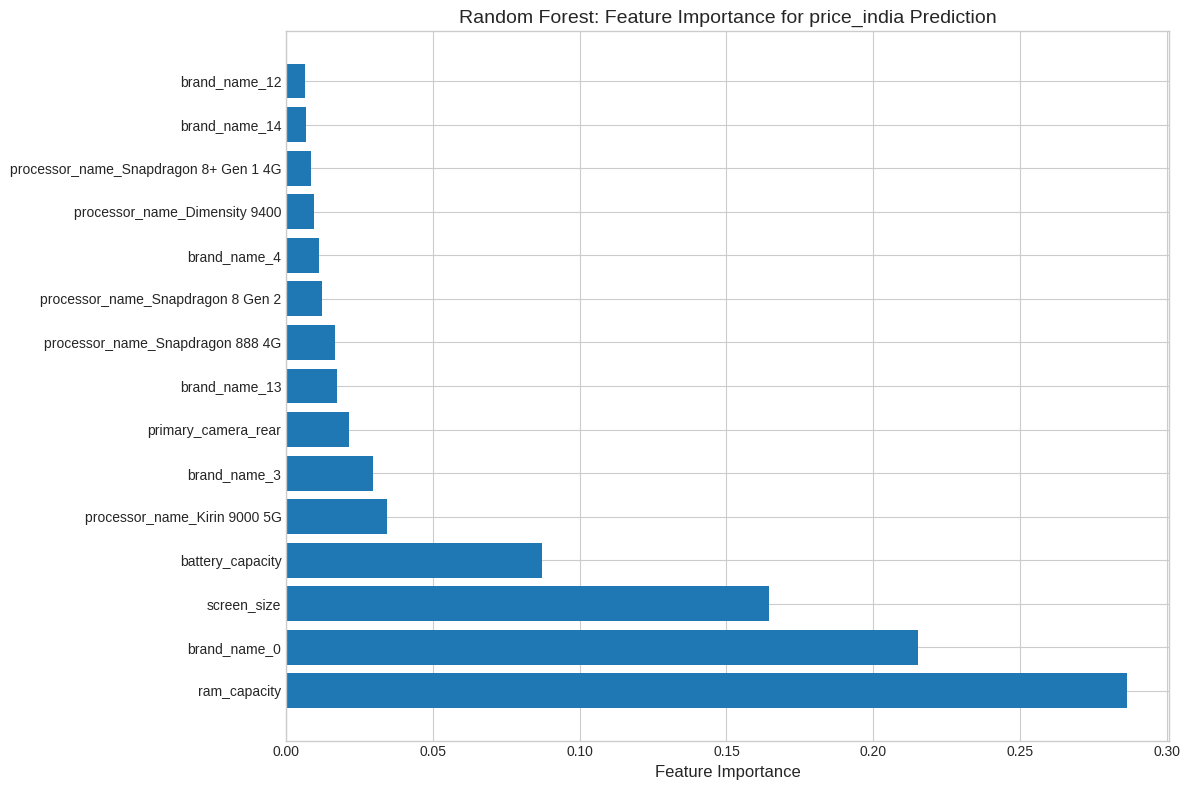


  Feature categories ranked by importance:
      Feature Category  Total Importance
4           brand_name              0.31
0         ram_capacity              0.29
2          screen_size              0.16
5       processor_name              0.13
1     battery_capacity              0.09
3  primary_camera_rear              0.02


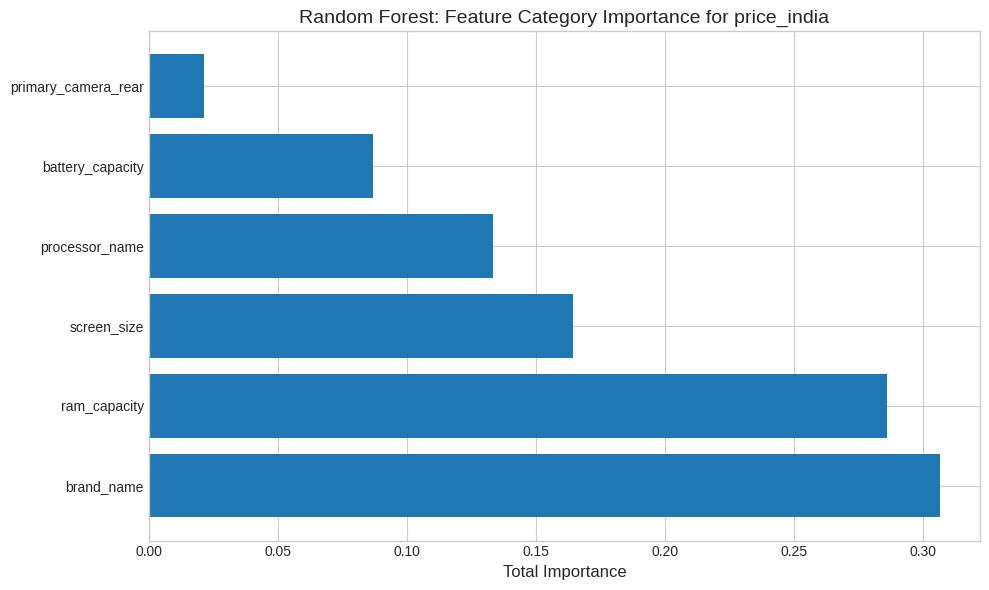


Training XGBoost model...
  R² Score: 0.8932
  RMSE: 13996.38


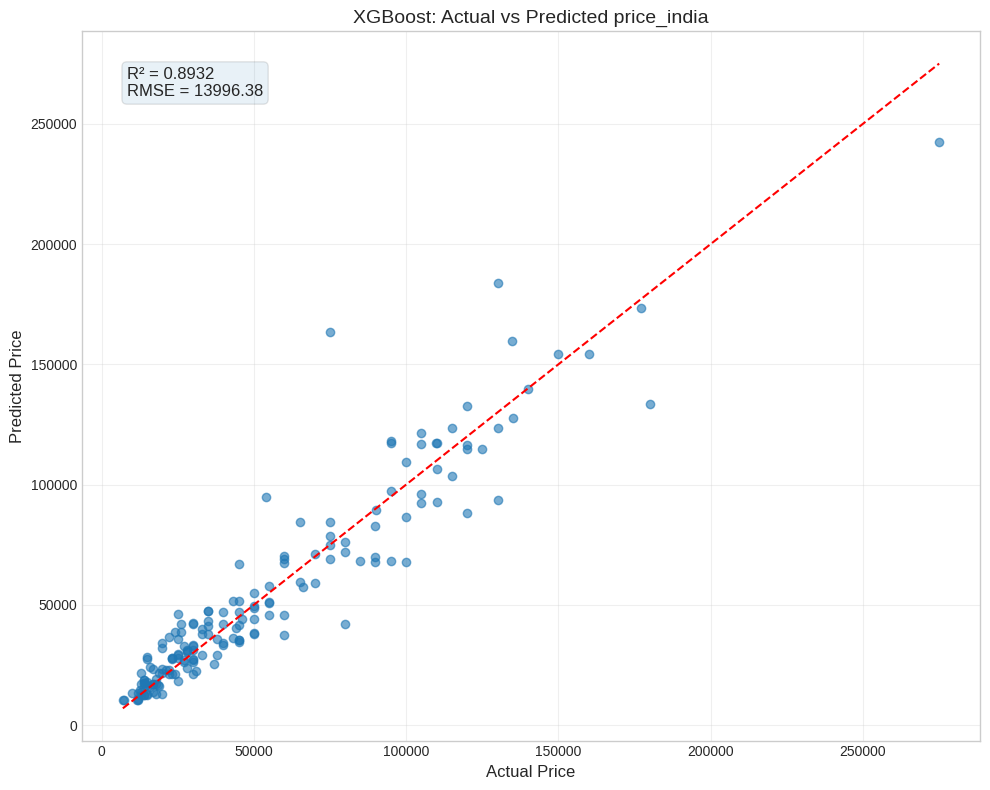

  Top 10 features by importance:
                               Feature  Importance
4                         brand_name_0        0.40
0                         ram_capacity        0.05
7                         brand_name_3        0.04
2                          screen_size        0.04
59        processor_name_Kirin 9000 5G        0.04
187   processor_name_Snapdragon 888 4G        0.03
8                         brand_name_4        0.03
177  processor_name_Snapdragon 8 Gen 2        0.02
17                       brand_name_13        0.02
16                       brand_name_12        0.02


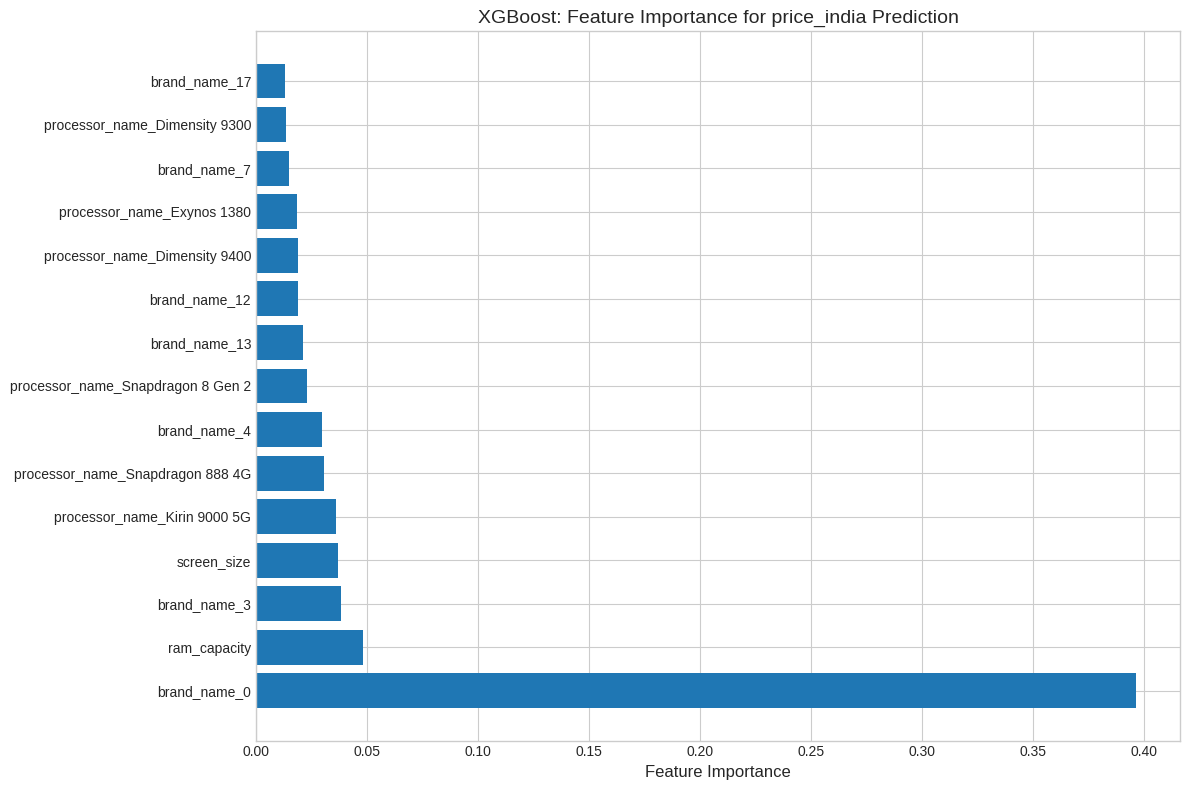


  Feature categories ranked by importance:
      Feature Category  Total Importance
4           brand_name              0.57
5       processor_name              0.32
0         ram_capacity              0.05
2          screen_size              0.04
1     battery_capacity              0.01
3  primary_camera_rear              0.01


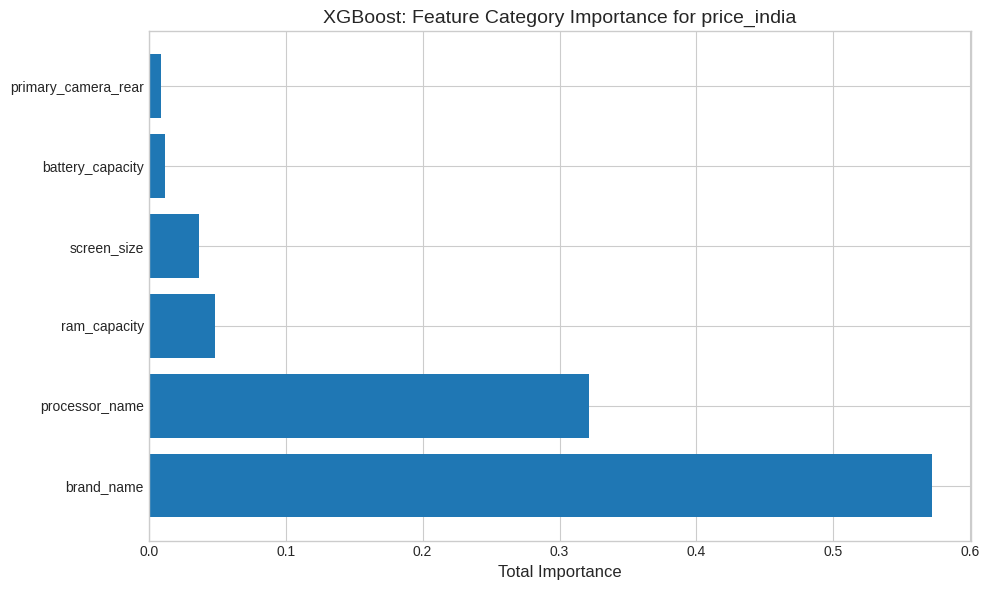


Best model for price_india: XGBoost (R² = 0.8932)


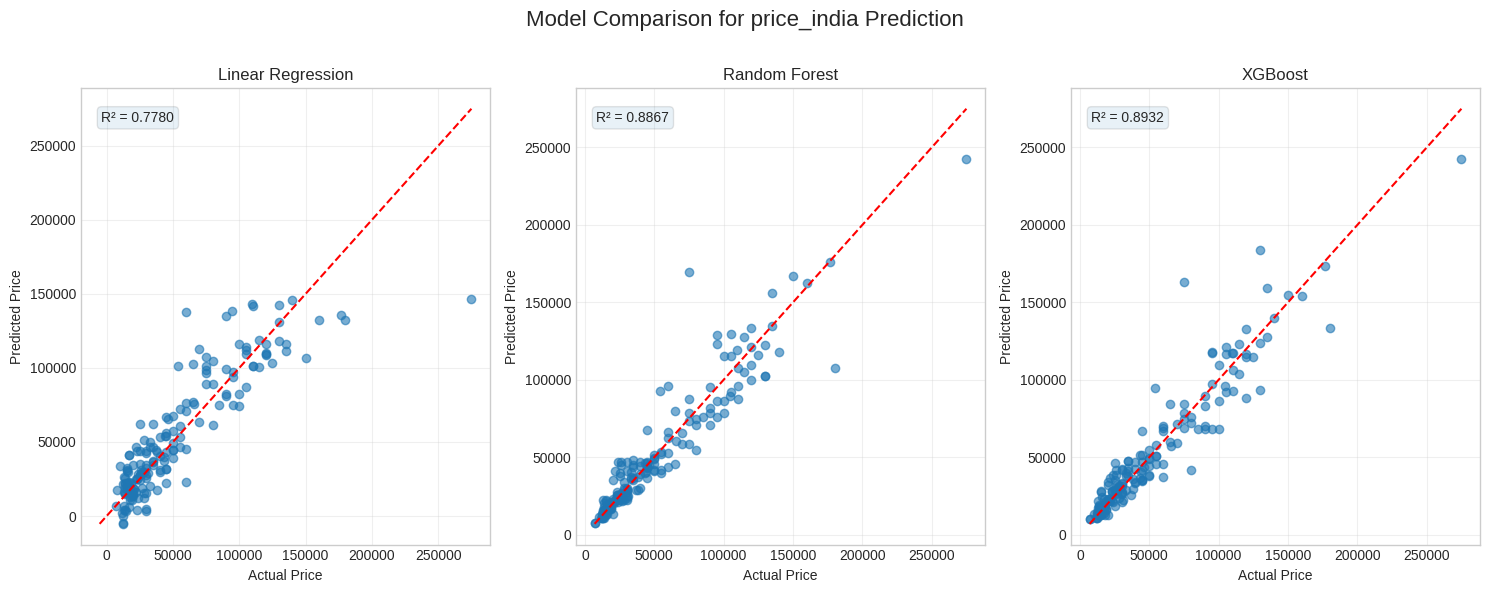


--- Modeling for price_global ---
Rows with valid price_global data: 262
Training set: 209 samples
Testing set: 53 samples

Training Linear Regression model...
  R² Score: 0.7091
  RMSE: 24442.62


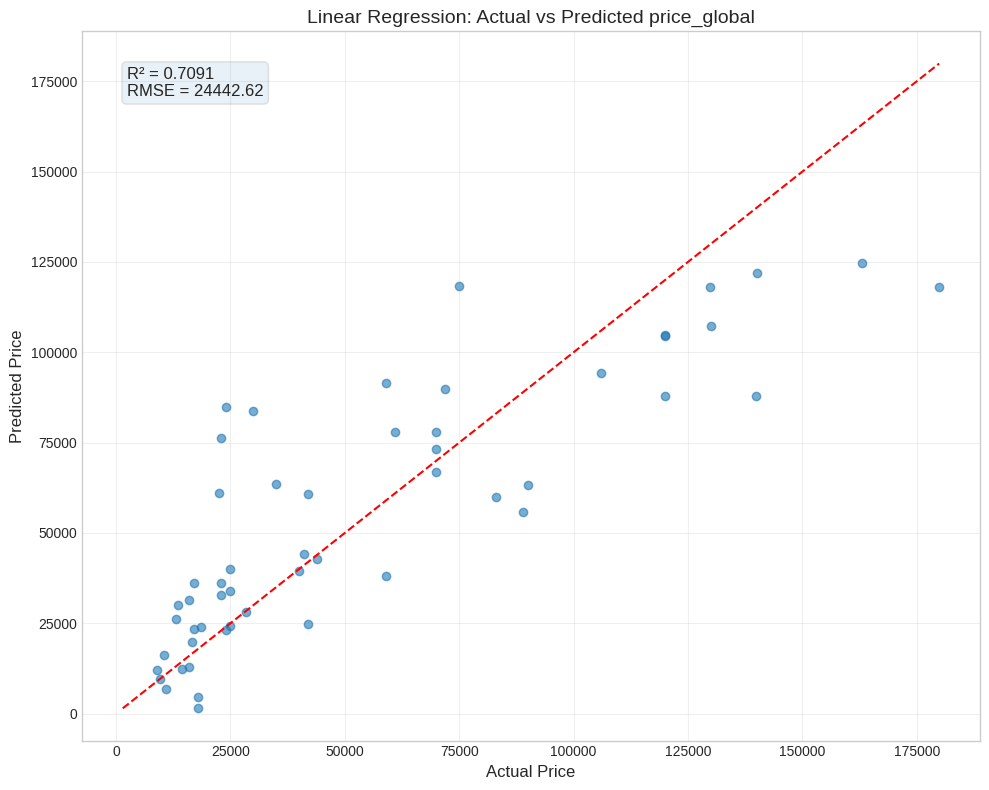


Training Random Forest model...
  R² Score: 0.8321
  RMSE: 18570.76


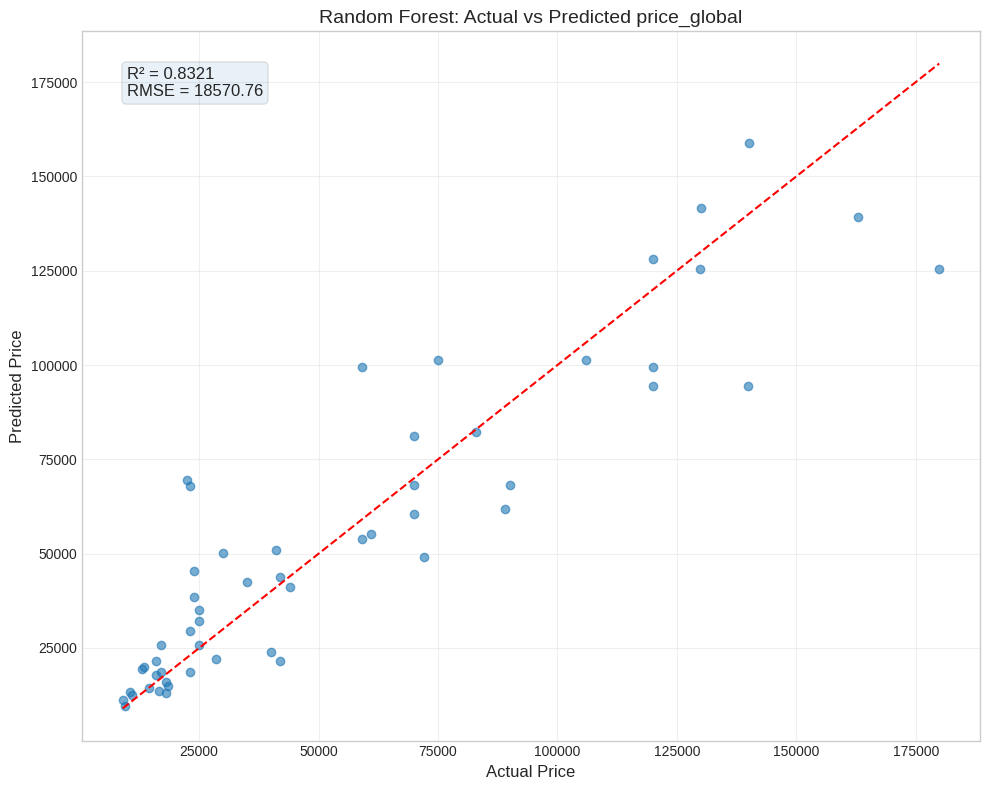

  Top 10 features by importance:
                  Feature  Importance
0            ram_capacity        0.24
2             screen_size        0.24
11  processor_name_bionic        0.14
1        battery_capacity        0.10
3     primary_camera_rear        0.07
4            brand_name_0        0.06
6            brand_name_3        0.06
17   processor_name_kirin        0.02
7            brand_name_5        0.02
9           brand_name_13        0.01


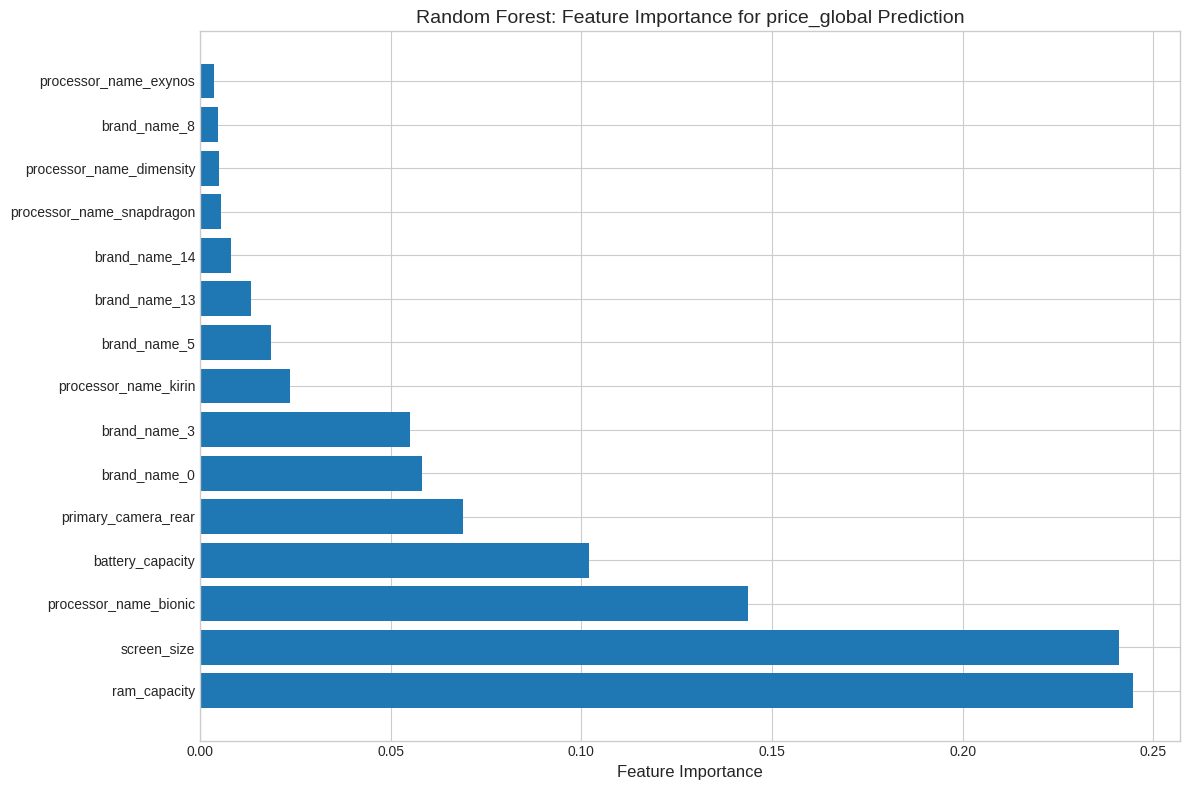


  Feature categories ranked by importance:
      Feature Category  Total Importance
0         ram_capacity              0.24
2          screen_size              0.24
5       processor_name              0.18
4           brand_name              0.16
1     battery_capacity              0.10
3  primary_camera_rear              0.07


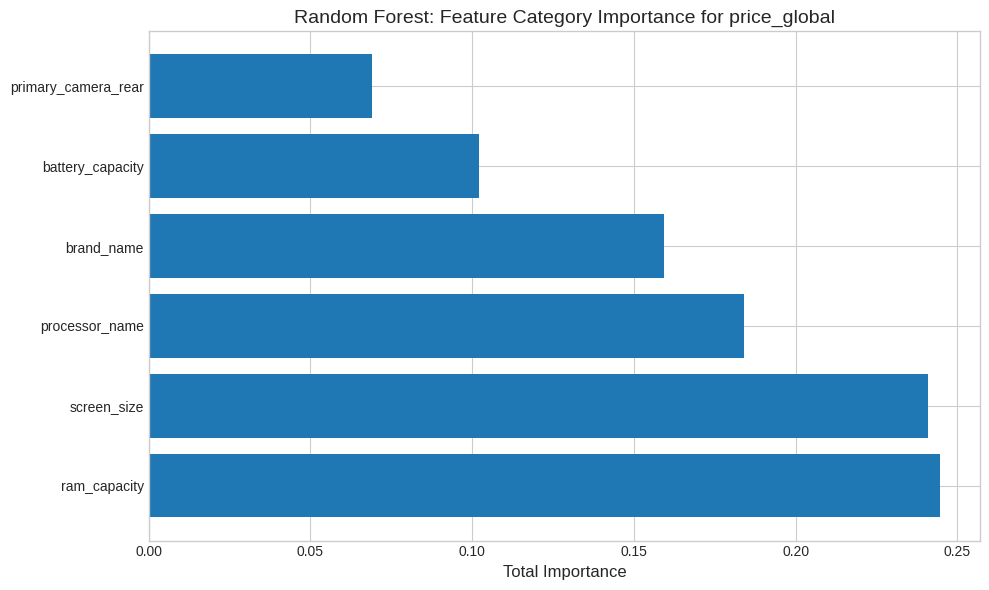


Training XGBoost model...
  R² Score: 0.8215
  RMSE: 19147.81


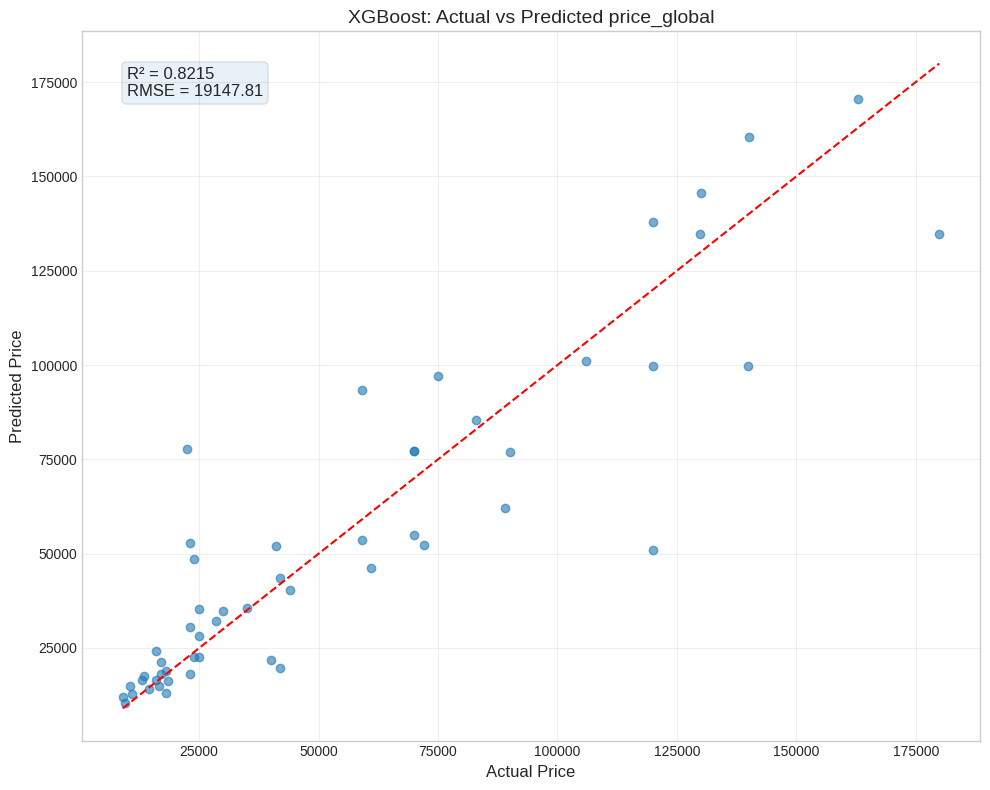

  Top 10 features by importance:
                  Feature  Importance
11  processor_name_bionic        0.68
4            brand_name_0        0.09
7            brand_name_5        0.04
2             screen_size        0.04
0            ram_capacity        0.03
6            brand_name_3        0.03
3     primary_camera_rear        0.02
17   processor_name_kirin        0.02
10          brand_name_14        0.01
13  processor_name_exynos        0.01


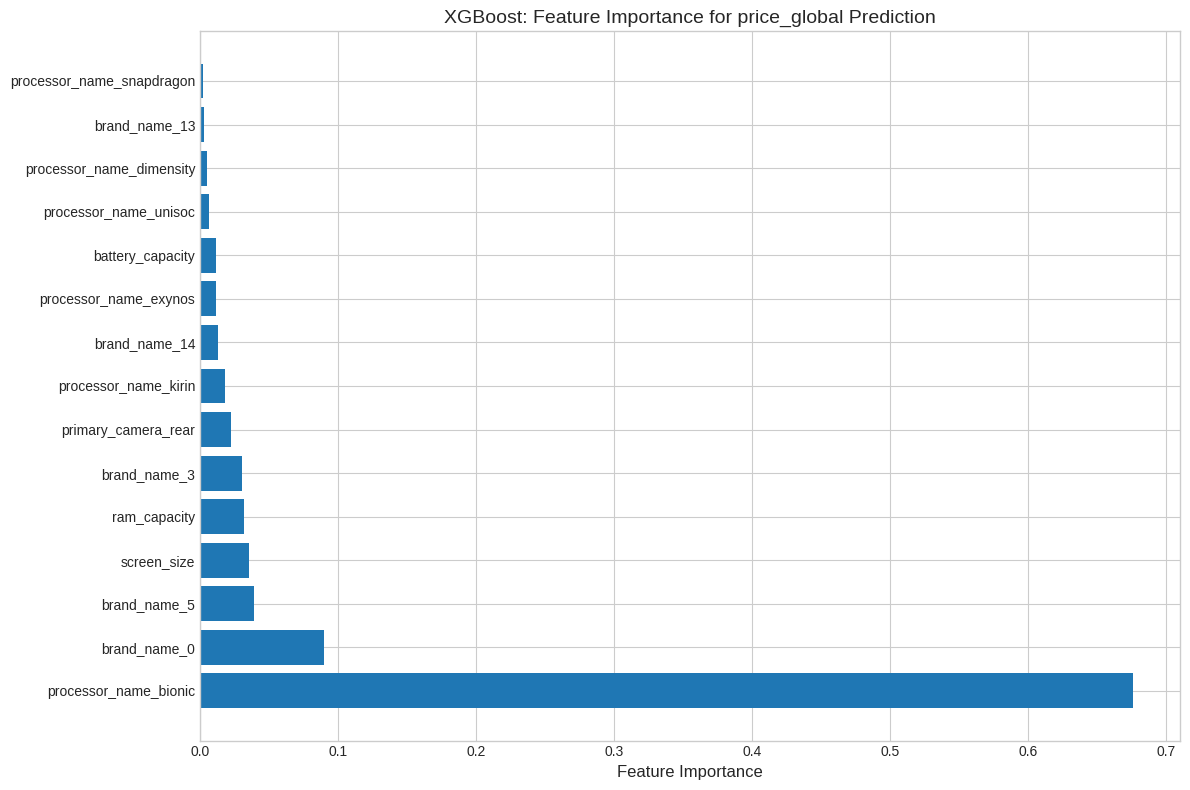


  Feature categories ranked by importance:
      Feature Category  Total Importance
5       processor_name              0.72
4           brand_name              0.18
2          screen_size              0.04
0         ram_capacity              0.03
3  primary_camera_rear              0.02
1     battery_capacity              0.01


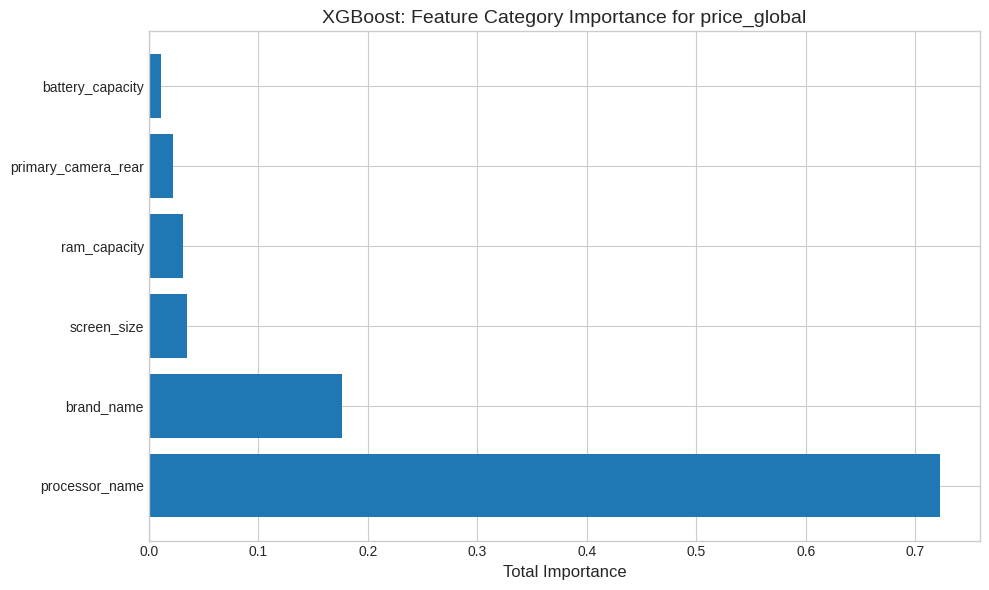


Best model for price_global: Random Forest (R² = 0.8321)


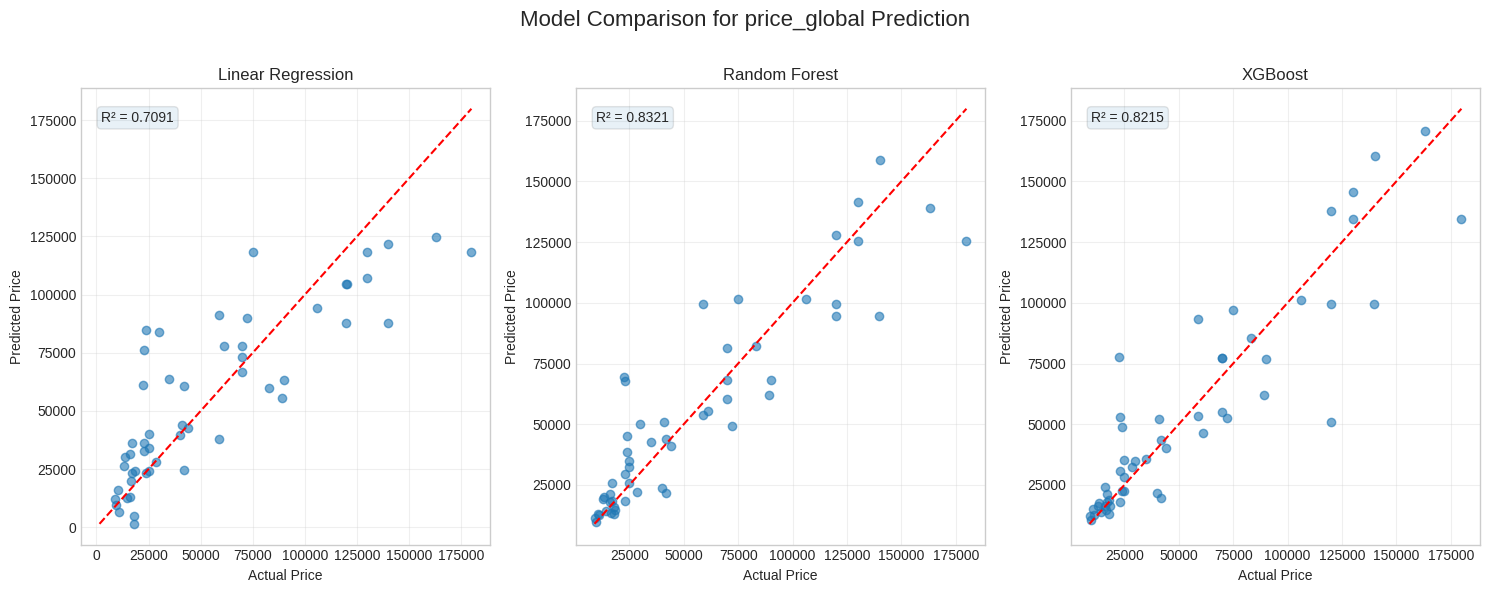


=== Summary of Price Prediction Models ===
   Price Column     Best Model  R² Score     RMSE  Sample Size
0     price_usa  Random Forest      0.89   148.11          847
1   price_china        XGBoost      0.91   783.27          846
2   price_india        XGBoost      0.89 13996.38          847
3  price_global  Random Forest      0.83 18570.76          262


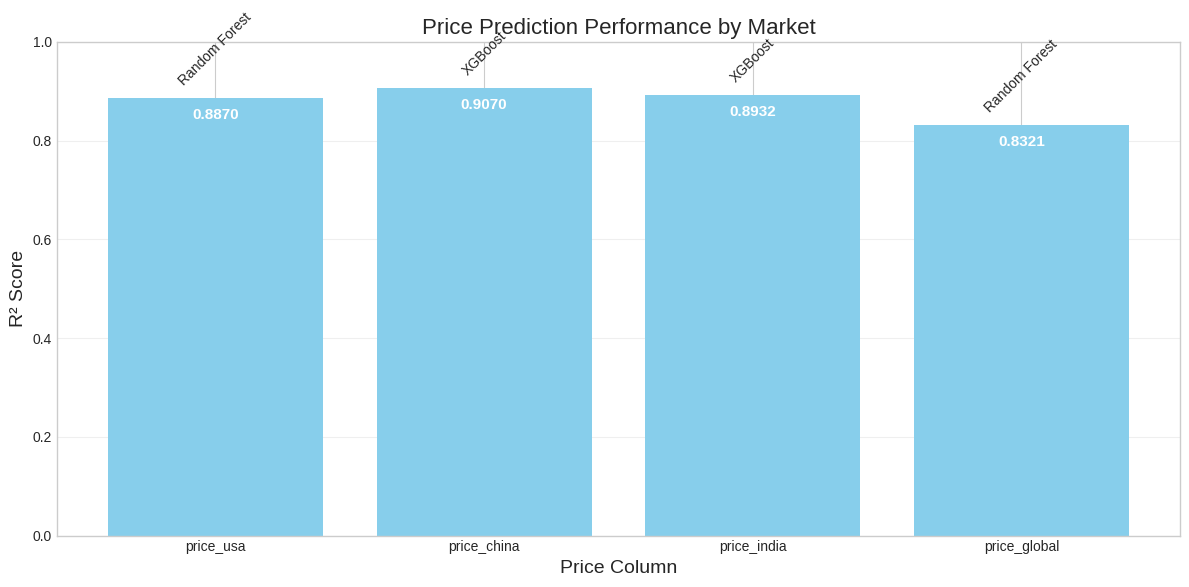

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset if not already in memory
try:
    df = combined_df
    print("Using existing combined DataFrame")
except NameError:
    df = pd.read_csv('combined_mobile_data.csv')
    print(f"Loaded dataset from file with {len(df)} records")

# Print dataset info
print(f"Dataset shape: {df.shape}")
print(f"Available columns: {df.columns.tolist()}")

# Define feature columns - using processor_name instead of speed
feature_columns = [
    'ram_capacity', 
    'battery_capacity', 
    'screen_size', 
    'primary_camera_rear', 
    'brand_name',
    'processor_name'  # Categorical feature
]

# Define price columns to predict
price_columns = ['price_usa', 'price_china', 'price_india', 'price_global']

# Filter to only use features that exist in the dataframe
available_features = [col for col in feature_columns if col in df.columns]
available_price_cols = [col for col in price_columns if col in df.columns]

print(f"Available features: {available_features}")
print(f"Available price columns: {available_price_cols}")

# Identify numerical and categorical features
categorical_features = ['brand_name', 'processor_name']
categorical_features = [feat for feat in categorical_features if feat in available_features]
numerical_features = [feat for feat in available_features if feat not in categorical_features]

print(f"Numerical features: {numerical_features}")
print(f"Categorical features: {categorical_features}")

# Fill missing values
# For numerical features: use median
for feat in numerical_features:
    df[feat] = df[feat].fillna(df[feat].median())

# For categorical features: use 'unknown'
for feat in categorical_features:
    df[feat] = df[feat].fillna('unknown')


# Run models for each available price column
results = []

for price_col in available_price_cols:
    print(f"\n--- Modeling for {price_col} ---")
    
    # Keep only rows with non-null price values for this column
    valid_data = df[~df[price_col].isna()].copy()
    print(f"Rows with valid {price_col} data: {len(valid_data)}")
    
    if len(valid_data) < 20:
        print(f"Not enough data for modeling {price_col}. Skipping.")
        continue
    
    # Split features and target
    X = valid_data[available_features]
    y = valid_data[price_col]
    
    # Create preprocessing pipeline with OneHotEncoder for categorical features
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_features),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
        ])
    
    # Split dataset into training & testing sets (80-20 split)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print(f"Training set: {len(X_train)} samples")
    print(f"Testing set: {len(X_test)} samples")
    
    # Implement multiple models using pipelines
    pipelines = {
        'Linear Regression': Pipeline([
            ('preprocessor', preprocessor),
            ('model', LinearRegression())
        ]),
        'Random Forest': Pipeline([
            ('preprocessor', preprocessor),
            ('model', RandomForestRegressor(n_estimators=100, random_state=42))
        ]),
        'XGBoost': Pipeline([
            ('preprocessor', preprocessor),
            ('model', xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, objective='reg:squarederror'))
        ])
    }
    
    model_results = []
    actual_vs_predicted = {}
    
    for model_name, pipeline in pipelines.items():
        print(f"\nTraining {model_name} model...")
        pipeline.fit(X_train, y_train)
        
        # Predict on test data
        y_pred = pipeline.predict(X_test)
        
        # Store actual vs predicted values
        actual_vs_predicted[model_name] = {
            'actual': y_test,
            'predicted': y_pred
        }
        
        # Evaluate model performance
        r2 = r2_score(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        
        print(f"  R² Score: {r2:.4f}")
        print(f"  RMSE: {rmse:.2f}")
        
        model_results.append({
            'Model': model_name,
            'R² Score': r2,
            'RMSE': rmse
        })
        
        # Create actual vs predicted plot
        plt.figure(figsize=(10, 8))
        
        # Calculate min and max for both axes
        min_val = min(min(y_test), min(y_pred))
        max_val = max(max(y_test), max(y_pred))
        
        # Create the scatter plot
        plt.scatter(y_test, y_pred, alpha=0.6)
        
        # Add perfect prediction line
        plt.plot([min_val, max_val], [min_val, max_val], 'r--')
        
        # Add labels and title
        plt.xlabel('Actual Price', fontsize=12)
        plt.ylabel('Predicted Price', fontsize=12)
        plt.title(f'{model_name}: Actual vs Predicted {price_col}', fontsize=14)
        
        # Add R² and RMSE as text
        plt.text(0.05, 0.95, f'R² = {r2:.4f}\nRMSE = {rmse:.2f}', 
                transform=plt.gca().transAxes, fontsize=12,
                verticalalignment='top', bbox=dict(boxstyle='round', alpha=0.1))
        
        # Add gridlines
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        
        # Save the figure
        plt.savefig(f'actual_vs_predicted_{price_col}_{model_name.replace(" ", "_")}.png', dpi=300)
        plt.show()
        
        # For tree-based models, we can analyze feature importance
        if model_name in ['Random Forest', 'XGBoost']:
            # Get the preprocessing object and model
            preprocessor = pipeline.named_steps['preprocessor']
            model = pipeline.named_steps['model']
            
            # Get feature names after one-hot encoding
            ohe = preprocessor.named_transformers_['cat']
            feature_names = (
                numerical_features +
                list(ohe.get_feature_names_out(categorical_features))
            )
            
            # Get feature importances
            importances = model.feature_importances_
            
            # Create DataFrame of feature importances
            importance_df = pd.DataFrame({
                'Feature': feature_names,
                'Importance': importances
            }).sort_values('Importance', ascending=False)
            
            # Print top 10 features
            print(f"  Top 10 features by importance:")
            print(importance_df.head(10))
            
            # Visualize top 15 features
            plt.figure(figsize=(12, 8))
            plt.barh(importance_df.head(15)['Feature'], importance_df.head(15)['Importance'])
            plt.xlabel('Feature Importance', fontsize=12)
            plt.title(f'{model_name}: Feature Importance for {price_col} Prediction', fontsize=14)
            plt.tight_layout()
            plt.savefig(f'feature_importance_{price_col}_{model_name.replace(" ", "_")}.png', dpi=300)
            plt.show()
            
            # Also group features by category for a higher-level view
            grouped_importance = {}
            
            # Group numerical features (these remain as is)
            for feat in numerical_features:
                grouped_importance[feat] = importance_df[importance_df['Feature'] == feat]['Importance'].sum()
            
            # Group categorical features (combine all one-hot encoded features)
            for cat_feat in categorical_features:
                cat_feat_cols = [col for col in feature_names if col.startswith(f"{cat_feat}_")]
                grouped_importance[cat_feat] = importance_df[importance_df['Feature'].isin(cat_feat_cols)]['Importance'].sum()
            
            # Create a DataFrame for the grouped importances
            grouped_df = pd.DataFrame({
                'Feature Category': list(grouped_importance.keys()),
                'Total Importance': list(grouped_importance.values())
            }).sort_values('Total Importance', ascending=False)
            
            print("\n  Feature categories ranked by importance:")
            print(grouped_df)
            
            # Visualize grouped feature importance
            plt.figure(figsize=(10, 6))
            plt.barh(grouped_df['Feature Category'], grouped_df['Total Importance'])
            plt.xlabel('Total Importance', fontsize=12)
            plt.title(f'{model_name}: Feature Category Importance for {price_col}', fontsize=14)
            plt.tight_layout()
            plt.savefig(f'feature_group_importance_{price_col}_{model_name.replace(" ", "_")}.png', dpi=300)
            plt.show()
    
    # Find best model for this price column
    best_model = max(model_results, key=lambda x: x['R² Score'])
    print(f"\nBest model for {price_col}: {best_model['Model']} (R² = {best_model['R² Score']:.4f})")
    
    # Add to overall results
    results.append({
        'Price Column': price_col,
        'Best Model': best_model['Model'],
        'R² Score': best_model['R² Score'],
        'RMSE': best_model['RMSE'],
        'Sample Size': len(valid_data)
    })
    
    # Create comparison of actual vs predicted for all models
    plt.figure(figsize=(15, 6))
    
    for i, (model_name, data) in enumerate(actual_vs_predicted.items()):
        plt.subplot(1, 3, i+1)
        plt.scatter(data['actual'], data['predicted'], alpha=0.6)
        
        # Calculate min and max for both axes
        min_val = min(min(data['actual']), min(data['predicted']))
        max_val = max(max(data['actual']), max(data['predicted']))
        
        # Add perfect prediction line
        plt.plot([min_val, max_val], [min_val, max_val], 'r--')
        
        # Add labels and title
        plt.xlabel('Actual Price', fontsize=10)
        plt.ylabel('Predicted Price', fontsize=10)
        plt.title(f'{model_name}', fontsize=12)
        
        # Add R² as text
        model_r2 = r2_score(data['actual'], data['predicted'])
        plt.text(0.05, 0.95, f'R² = {model_r2:.4f}', 
                transform=plt.gca().transAxes, fontsize=10,
                verticalalignment='top', bbox=dict(boxstyle='round', alpha=0.1))
        
        # Add gridlines
        plt.grid(True, alpha=0.3)
    
    plt.suptitle(f'Model Comparison for {price_col} Prediction', fontsize=16)
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    plt.savefig(f'model_comparison_{price_col}.png', dpi=300)
    plt.show()

# Display summary of all models
if results:
    results_df = pd.DataFrame(results)
    print("\n=== Summary of Price Prediction Models ===")
    print(results_df)
    
    # Create comparison chart of R² scores
    plt.figure(figsize=(12, 6))
    bars = plt.bar(results_df['Price Column'], results_df['R² Score'], color='skyblue')
    
    # Add model name to each bar
    for i, bar in enumerate(bars):
        plt.text(bar.get_x() + bar.get_width()/2., 
                bar.get_height() + 0.02,
                results_df['Best Model'].iloc[i], 
                ha='center', va='bottom', fontsize=10, rotation=45)
    
    plt.title('Price Prediction Performance by Market', fontsize=16)
    plt.xlabel('Price Column', fontsize=14)
    plt.ylabel('R² Score', fontsize=14)
    plt.ylim(0, 1)  # R² is typically between 0 and 1
    plt.grid(axis='y', alpha=0.3)
    
    # Add labels above bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height - 0.05,
                f'{height:.4f}', ha='center', va='bottom', fontsize=11, 
                color='white', fontweight='bold')
    
    plt.tight_layout()
    plt.savefig('price_prediction_comparison.png')
    plt.show()
else:
    print("No price prediction models could be built due to insufficient data.")